In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

num_records = 20
dane = {
    'ID': range(101, 101 + num_records),
    'Wiek': np.random.randint(18, 65, size=num_records),
    'Plec': np.random.choice(['M', 'K'], size=num_records),
    'Wyksztalcenie': np.random.choice(['Podstawowe', 'Srednie', 'Wyzsze', 'Doktorat'], size=num_records),
    'Roczny_dochod': np.random.randint(20000, 120000, size=num_records),
    'Wydatki_mieszkanie': np.random.randint(5000, 25000, size=num_records),
    'Wydatki_zywnosci': np.random.randint(2000, 10000, size=num_records),
    'Wydatki_transport': np.random.randint(1000, 7000, size=num_records),
    'Wydatki_edukacja': np.random.randint(500, 5000, size=num_records),
    'Kredyty': np.random.randint(0, 50000, size=num_records),
    'Karty_kredytowe': np.random.randint(0, 10000, size=num_records),
    'Osoby_zalezne': np.random.randint(0, 4, size=num_records),
    'Oszczednosci': np.random.randint(0, 50000, size=num_records),
    'Inwestycje_akcje': np.random.randint(0, 20000, size=num_records),
    'Inwestycje_nieruchomosci': np.random.randint(0, 60000, size=num_records),
    'Stanowisko': np.random.choice(['Analityk', 'Kierownik', 'Inzynier', 'Specjalista', 'Profesor'], size=num_records),
    'Branza': np.random.choice(['Finanse', 'Handel', 'Technologia', 'Marketing', 'Edukacja'], size=num_records),
    'Lata_doswiadczenia': np.random.randint(0, 40, size=num_records)
}
print(dane)

df = pd.read_csv('dane_dla_studentow2.csv', encoding='latin1', sep=';')
df.head()
dane_df = pd.DataFrame(dane)

print(df)
print(df.info())
print(dane_df.info())

df_combined = pd.concat([df, dane_df])
print(df_combined.info())

rows_with_nulls = df_combined[df_combined.isnull().any(axis=1)]
print(rows_with_nulls)

print(df_combined.tail())

df_combined['Wyksztalcenie'] = df_combined['Wyksztalcenie'].replace('Tehnik', 'Technik')

df_combined = df_combined[df_combined['Wiek'] <= 100]
print(df_combined.info())


{'ID': range(101, 121), 'Wiek': array([41, 55, 44, 55, 20, 22, 49, 47, 58, 42, 44, 47, 41, 32, 38, 61, 60,
       40, 29, 30]), 'Plec': array(['K', 'M', 'M', 'M', 'K', 'M', 'M', 'K', 'M', 'K', 'M', 'M', 'M',
       'M', 'M', 'M', 'K', 'M', 'K', 'M'], dtype='<U1'), 'Wyksztalcenie': array(['Podstawowe', 'Wyzsze', 'Wyzsze', 'Podstawowe', 'Wyzsze',
       'Srednie', 'Wyzsze', 'Wyzsze', 'Wyzsze', 'Srednie', 'Podstawowe',
       'Wyzsze', 'Podstawowe', 'Doktorat', 'Doktorat', 'Doktorat',
       'Doktorat', 'Srednie', 'Wyzsze', 'Doktorat'], dtype='<U10'), 'Roczny_dochod': array([ 63159,  24324,  28942,  91650, 103908,  53553,  88314,  42171,
        71194,  34706,  63864,  63993,  91457,  39825,  37831,  40871,
        41491,  46478,  31173,  25432]), 'Wydatki_mieszkanie': array([10836, 19259, 19636, 10058, 19691, 23693, 15039,  7356, 13050,
       19099, 12537, 11579, 12985,  5624, 21236, 15490, 13903,  6139,
       18553, 10632]), 'Wydatki_zywnosci': array([8740, 8207, 4549, 2072, 6475, 651

In [2]:
# 1. Analiza demograficzna:

# Analiza demograficzna:
# •Zadanie polega na analizie demograficznej osób pod
# względem wieku, płci i wykształcenia. Osoby mogą być
# podzieleni na grupy wiekowe, płciowe, a także analizowane pod
# kątem ich poziomu wykształcenia. Zadaniem Waszym będzie
# przeprowadzenie analizy danych demograficznych, wykreślenie
# podstawowych statystyk, takich jak średni wiek, rozkład płci czy
# dominujący poziom wykształcenia.
# Obliczanie średniego wieku

average_age = df_combined['Wiek'].mean()
print("Średni wiek:", average_age)


Średni wiek: 39.63865546218487


In [3]:
# Analiza rozkładu płci
gender_distribution = df_combined['Plec'].value_counts()
print("Rozkład płci:")
print(gender_distribution)


Rozkład płci:
M    72
K    47
Name: Plec, dtype: int64


In [4]:
# Analiza dominującego poziomu wykształcenia
dominant_education_level = df_combined['Wyksztalcenie'].mode()[0]
print("Dominujący poziom wykształcenia:", dominant_education_level)

Dominujący poziom wykształcenia: Wyzsze


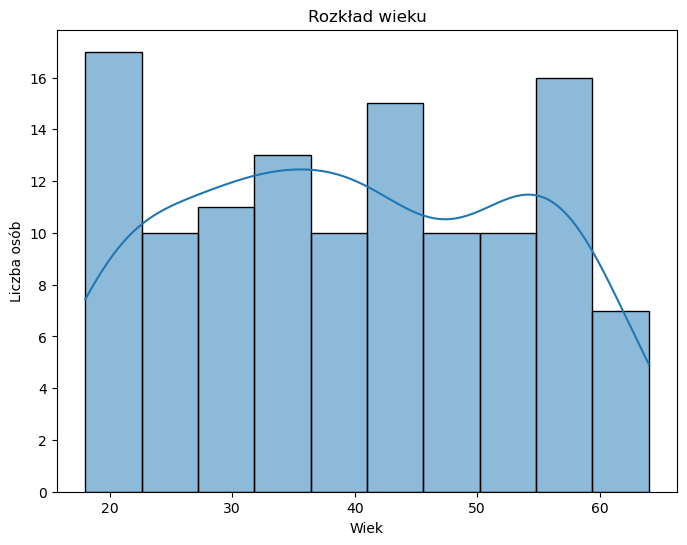

In [5]:
# Wykres rozkładu wieku
plt.figure(figsize=(8, 6))
sns.histplot(df_combined['Wiek'], bins=10, kde=True)
plt.title("Rozkład wieku")
plt.xlabel("Wiek")
plt.ylabel("Liczba osób")
plt.show()

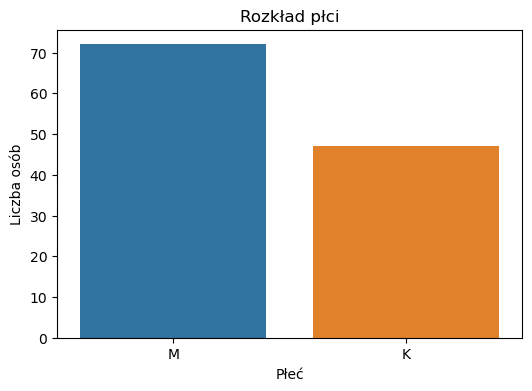

In [6]:
# Wykres rozkładu płci
plt.figure(figsize=(6, 4))
sns.countplot(x='Plec', data=df_combined)
plt.title("Rozkład płci")
plt.xlabel("Płeć")
plt.ylabel("Liczba osób")
plt.show()


['Podstawowe' 'Wyzsze' 'Doktorat' 'Srednie' 'Technik']


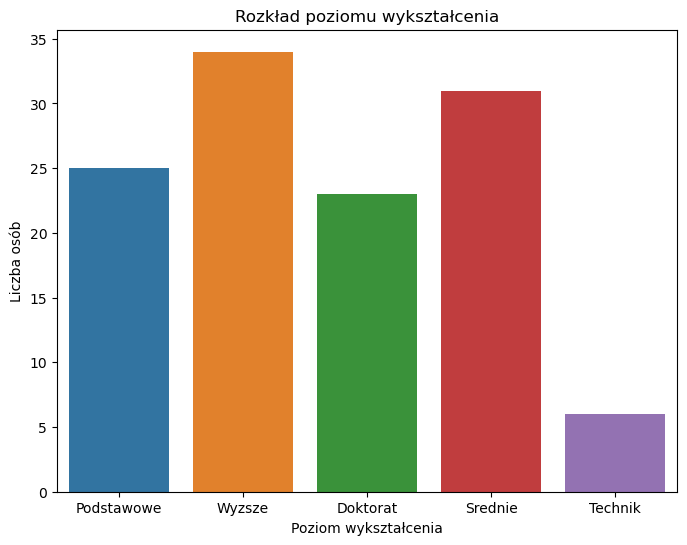

In [7]:
unique_education_levels = df_combined['Wyksztalcenie'].unique()
print(unique_education_levels)

# Wykres rozkładu poziomu wykształcenia
plt.figure(figsize=(8, 6))
sns.countplot(x='Wyksztalcenie', data=df_combined, order=unique_education_levels)
plt.title("Rozkład poziomu wykształcenia")
plt.xlabel("Poziom wykształcenia")
plt.ylabel("Liczba osób")
plt.show()


Wzór regresji liniowej:
Roczny_dochod = 68191.46216097818 + 107.0222605138006 * Wiek
Root Mean Squared Error (RMSE): 28561.6336420723
Coefficient of determination (R^2): 0.0025419836481820335


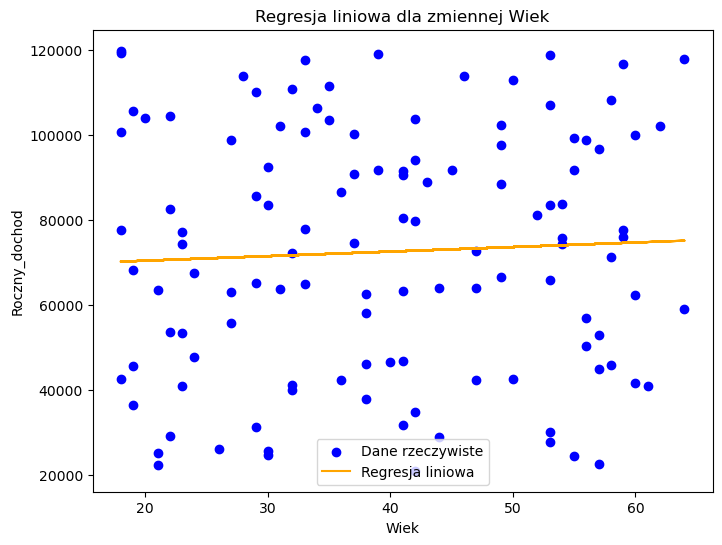

Root Mean Squared Error (RMSE): Wynosi 28561.63. 
 Jest to duży średni błąd prognoz.
Coefficient of determination (R^2): Wynosi 0.003, co oznacza, że model wyjaśnia około 0.3% wariancji zmiennej zależnej (roczny dochód). 
 Jest to także bardzo słaby wynik.


In [8]:
# 2. Modelowanie predykcyjne:

# Modelowanie predykcyjne:
# •Zadanie polega na stworzeniu modelu predykcyjnego opartego
# na danych. Może to być na przykład model przewidujący
# dochód na podstawie wieku, wykształcenia i doświadczenia
# zawodowego. Nauczycie się budować model regresji liniowej lub
# inne modele predykcyjne, ocenić ich skuteczność i interpretować
# wyniki.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dane wejściowe
X = df_combined[['Wiek']]
y = df_combined['Roczny_dochod']

# Tworzenie i trenowanie modelu
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Pobranie współczynników regresji
intercept = model.intercept_  # przecięcie z osią y
coefficients = model.coef_  # współczynniki dla każdej zmiennej niezależnej

# Wyświetlenie wyników
print("Wzór regresji liniowej:")
print(f"Roczny_dochod = {intercept} + {coefficients[0]} * Wiek")

# Ewaluacja modelu
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of determination (R^2): {r2}")

# Wizualizacja dopasowania (opcjonalnie)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Dane rzeczywiste')
plt.plot(X, y_pred, color='orange', label='Regresja liniowa')
plt.xlabel('Wiek')
plt.ylabel('Roczny_dochod')
plt.title('Regresja liniowa dla zmiennej Wiek')
plt.legend()
plt.show()

print(f"Root Mean Squared Error (RMSE): Wynosi {rmse:.2f}. \n Jest to duży średni błąd prognoz.")
print(f"Coefficient of determination (R^2): Wynosi {r2:.3f}, co oznacza, że model wyjaśnia około {r2 * 100:.1f}% wariancji zmiennej zależnej (roczny dochód). \n Jest to także bardzo słaby wynik.")


   Wiek  Lata_doswiadczenia  Wyksztalcenie_Doktorat  Wyksztalcenie_Podstawowe  \
0    18                  31                       0                         1   
1    18                  19                       0                         1   
2    39                  16                       0                         1   
3    53                  37                       0                         0   
4    64                  32                       1                         0   

   Wyksztalcenie_Srednie  Wyksztalcenie_Technik  Wyksztalcenie_Wyzsze  
0                      0                      0                     0  
1                      0                      0                     0  
2                      0                      0                     0  
3                      0                      0                     1  
4                      0                      0                     0  


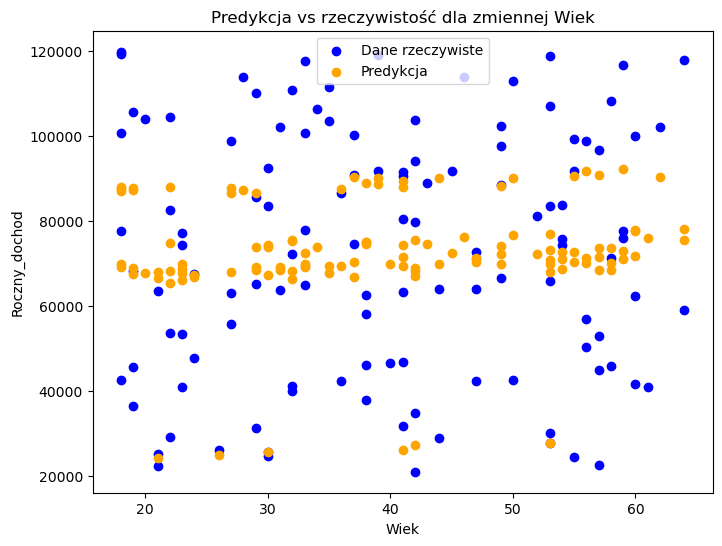

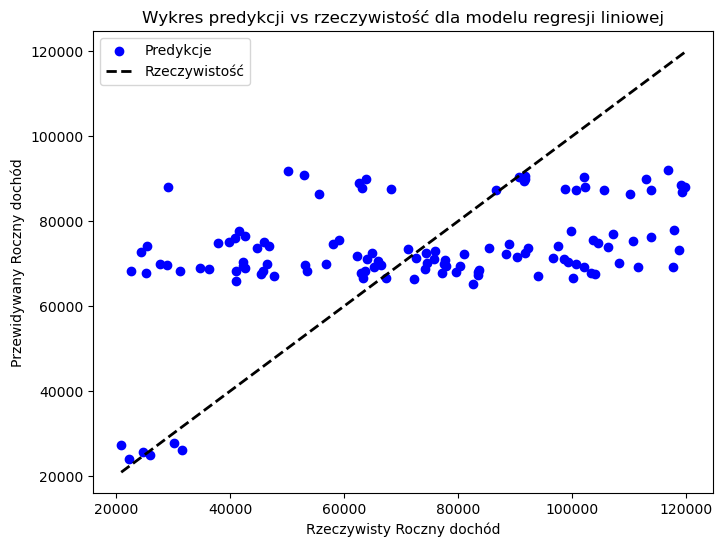

Root Mean Squared Error (RMSE): 25365.079110904284
Coefficient of determination (R^2): 0.21331480152340299

Wzór regresji liniowej:
Roczny_dochod = 60632.10 + 88.50 * Wiek + 84.91 * Lata_doswiadczenia + 8908.60 * Wyksztalcenie_Doktorat + 23056.65 * Wyksztalcenie_Podstawowe + 2581.82 * Wyksztalcenie_Średnie + -39191.00 * Wyksztalcenie_Technik + 4643.93 * Wyksztalcenie_Wyzsze

Wnioski:
Root Mean Squared Error (RMSE): Wynosi 25365.08. 
 Jest to duży średni błąd prognoz.
Coefficient of determination (R^2): Wynosi 0.213, co oznacza, że model wyjaśnia około 21.3% wariancji zmiennej zależnej (roczny dochód). 
 Jest to także słaby wynik.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_combined[['Wyksztalcenie', 'Wiek', 'Lata_doswiadczenia']]
X_encoded = pd.get_dummies(X, columns=['Wyksztalcenie'], prefix='Wyksztalcenie')

print(X_encoded.head())

y = df_combined['Roczny_dochod']

# Tworzenie i trenowanie modelu
model = LinearRegression()
model.fit(X_encoded, y)
y_pred = model.predict(X_encoded)

# Wykres predykcji vs rzeczywistość dla zmiennej wieku
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded['Wiek'], y, color='blue', label='Dane rzeczywiste')
plt.scatter(X_encoded['Wiek'], y_pred, color='orange', label='Predykcja')
plt.xlabel('Wiek')
plt.ylabel('Roczny_dochod')
plt.title('Predykcja vs rzeczywistość dla zmiennej Wiek')
plt.legend()
plt.show()

# Wykres predykcji vs rzeczywistość dla całego modelu
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Predykcje')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Rzeczywistość')
plt.title('Wykres predykcji vs rzeczywistość dla modelu regresji liniowej')
plt.xlabel('Rzeczywisty Roczny dochód')
plt.ylabel('Przewidywany Roczny dochód')
plt.legend()
plt.show()

# Ewaluacja modelu
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of determination (R^2): {r2}")

print("\nWzór regresji liniowej:")
print(f"Roczny_dochod = {model.intercept_:.2f} + "
      f"{model.coef_[0]:.2f} * Wiek + "
      f"{model.coef_[1]:.2f} * Lata_doswiadczenia + "
      f"{model.coef_[2]:.2f} * Wyksztalcenie_Doktorat + "
      f"{model.coef_[3]:.2f} * Wyksztalcenie_Podstawowe + "
      f"{model.coef_[4]:.2f} * Wyksztalcenie_Średnie + "
      f"{model.coef_[5]:.2f} * Wyksztalcenie_Technik + "
      f"{model.coef_[6]:.2f} * Wyksztalcenie_Wyzsze")

print("\nWnioski:")
print(f"Root Mean Squared Error (RMSE): Wynosi {rmse:.2f}. \n Jest to duży średni błąd prognoz.")
print(f"Coefficient of determination (R^2): Wynosi {r2:.3f}, co oznacza, że model wyjaśnia około {r2 * 100:.1f}% wariancji zmiennej zależnej (roczny dochód). \n Jest to także słaby wynik.")

# Regresja liniowa jest modelem o ograniczonej elastyczności, ponieważ zakłada prostą liniową zależność między zmiennymi niezależnymi 
# a zmienną zależną. W przypadku bardziej złożonych związków, 
# takich jak nieliniowe relacje między zmiennymi lub interakcje między nimi, 
# regresja liniowa może nie być w stanie ich właściwie modelować.

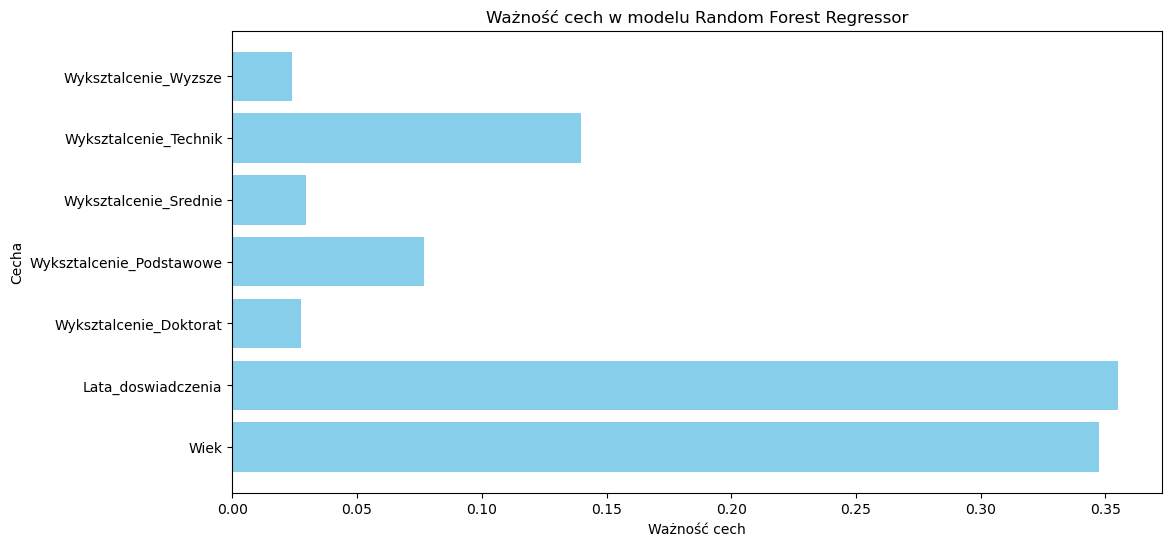

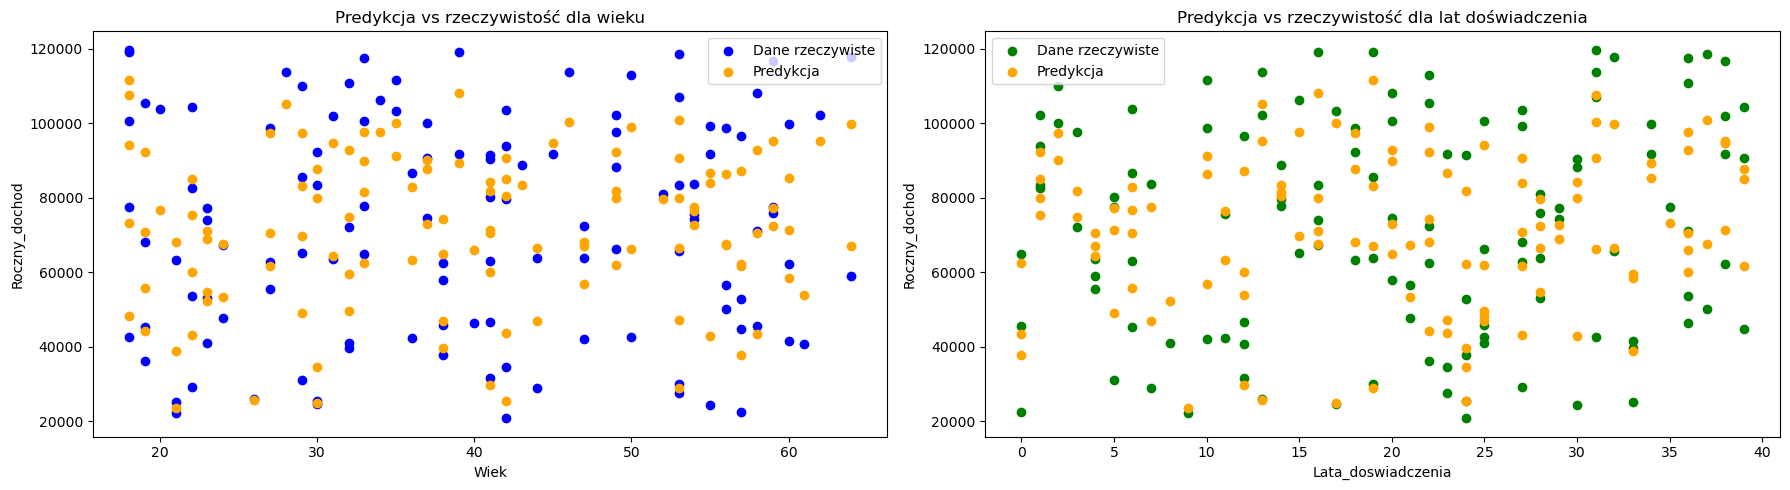

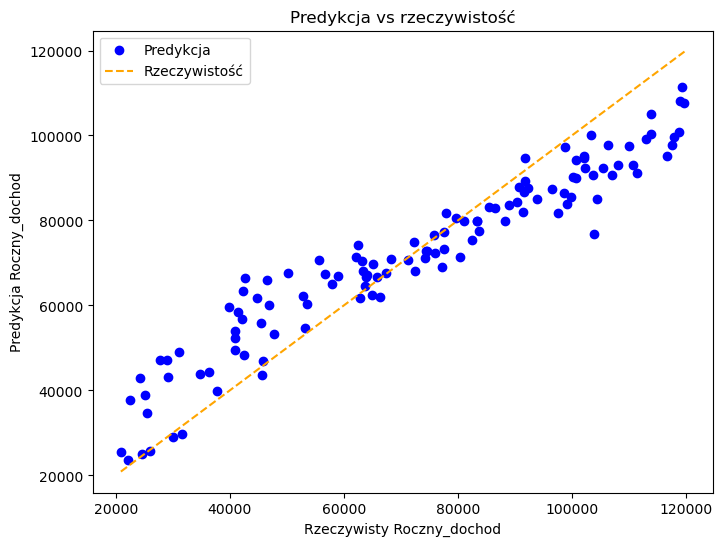

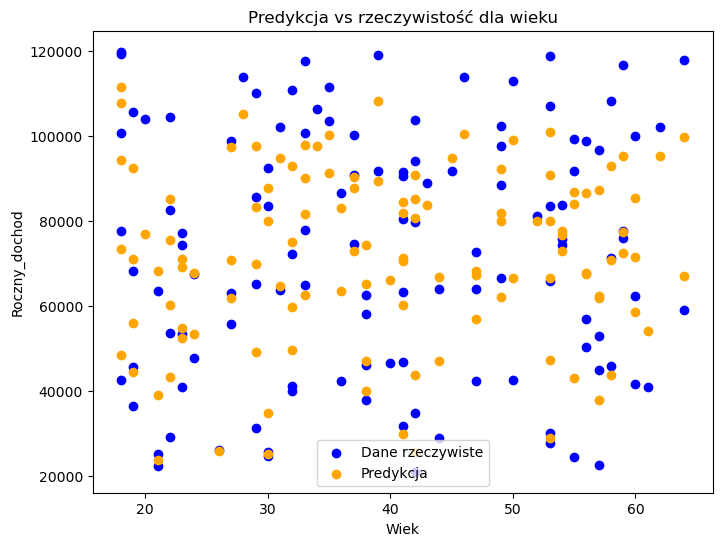

Wyniki modelu Random Forest Regressor:
Root Mean Squared Error (RMSE): 10915.004219836814
Coefficient of determination (R^2): 0.8543279095633579


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Dane wejściowe
# X = df_combined[['Wyksztalcenie', 'Wiek', 'Lata_doswiadczenia', 'Branza', 'Stanowisko', 'Osoby_zalezne']]
# X_encoded = pd.get_dummies(X, columns=['Wyksztalcenie', 'Branza', 'Stanowisko'], drop_first=True)
X = df_combined[['Wyksztalcenie', 'Wiek', 'Lata_doswiadczenia']]
X_encoded = pd.get_dummies(X, columns=['Wyksztalcenie'], prefix='Wyksztalcenie')

y = df_combined['Roczny_dochod']

# Tworzenie i trenowanie modelu Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_encoded, y)
y_pred = model.predict(X_encoded)

# Wizualizacja ważności cech
feature_importances = model.feature_importances_
features = X_encoded.columns

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Ważność cech')
plt.ylabel('Cecha')
plt.title('Ważność cech w modelu Random Forest Regressor')
plt.show()

# Wykresy predykcji vs rzeczywistość dla kilku zmiennych
plt.figure(figsize=(18, 5))

# Wykres dla wieku
plt.subplot(1, 2, 1)
plt.scatter(df_combined['Wiek'], y, color='blue', label='Dane rzeczywiste')
plt.scatter(df_combined['Wiek'], y_pred, color='orange', label='Predykcja')
plt.xlabel('Wiek')
plt.ylabel('Roczny_dochod')
plt.title('Predykcja vs rzeczywistość dla wieku')
plt.legend()

# Wykres dla latach doświadczenia
plt.subplot(1, 2, 2)
plt.scatter(df_combined['Lata_doswiadczenia'], y, color='green', label='Dane rzeczywiste')
plt.scatter(df_combined['Lata_doswiadczenia'], y_pred, color='orange', label='Predykcja')
plt.xlabel('Lata_doswiadczenia')
plt.ylabel('Roczny_dochod')
plt.title('Predykcja vs rzeczywistość dla lat doświadczenia')
plt.legend()


plt.tight_layout()
plt.show()

# Wykres predykcji vs rzeczywistość ogólny
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Predykcja')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='orange', label='Rzeczywistość')
plt.xlabel('Rzeczywisty Roczny_dochod')
plt.ylabel('Predykcja Roczny_dochod')
plt.title('Predykcja vs rzeczywistość')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_combined['Wiek'], y, color='blue', label='Dane rzeczywiste')
plt.scatter(df_combined['Wiek'], y_pred, color='orange', label='Predykcja')
plt.xlabel('Wiek')
plt.ylabel('Roczny_dochod')
plt.title('Predykcja vs rzeczywistość dla wieku')
plt.legend()
plt.show()


# Wyświetlenie wyników
print("Wyniki modelu Random Forest Regressor:")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y, y_pred))}")
print(f"Coefficient of determination (R^2): {r2_score(y, y_pred)}")


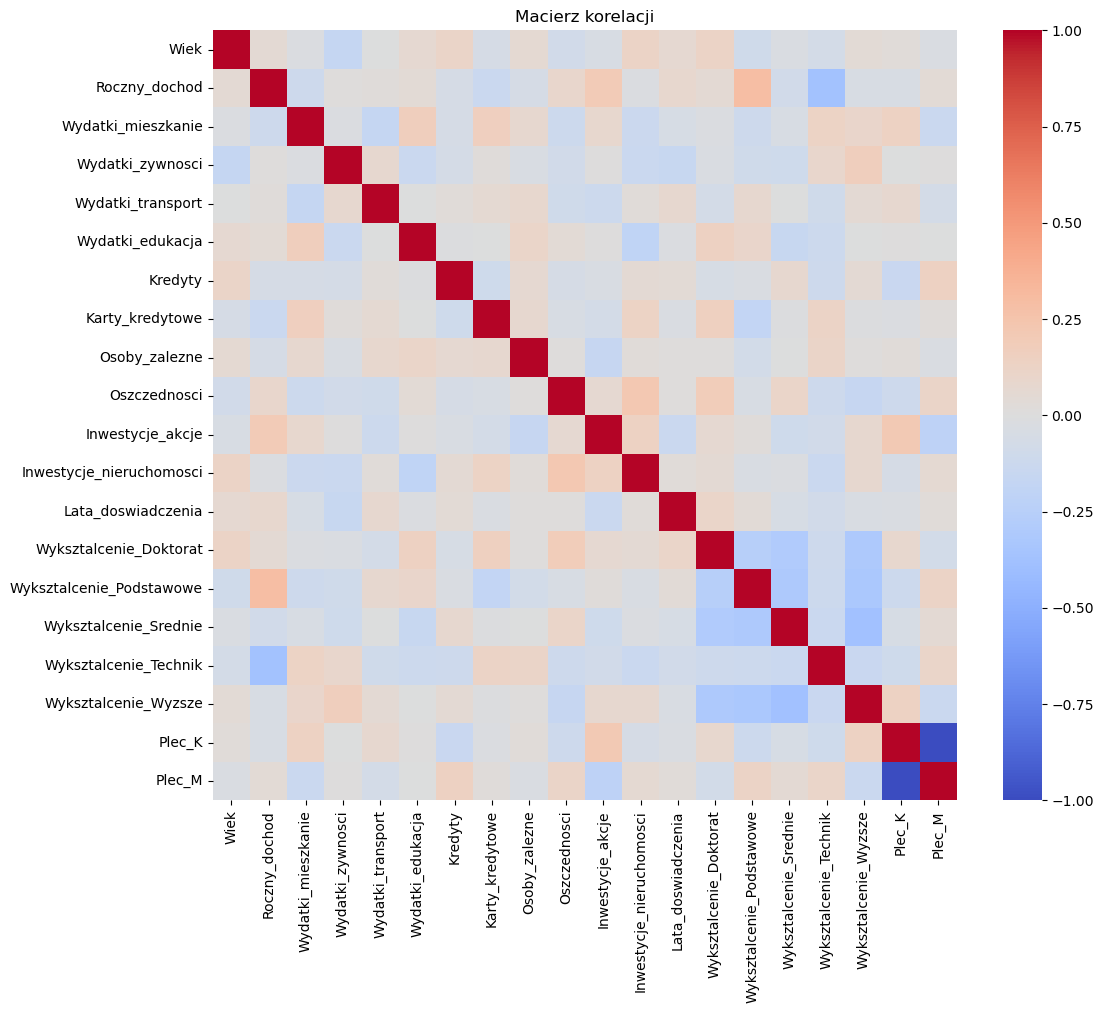

In [11]:
# 3. Analiza korelacji między zmiennymi:

# Analiza korelacji między zmiennymi:
# •Studenci mogą przeprowadzić analizę korelacji między różnymi
# zmiennymi w zbiorze danych, na przykład między dochodem a
# wydatkami, czy między wiekiem a oszczędnościami. Możecie
# także badać korelację między zmiennymi ekonomicznymi a
# innymi czynnikami, takimi jak edukacja czy doświadczenie
# zawodowe.

df_numeric = df_combined.drop(columns=['ID','Stanowisko', 'Branza'])
df_numeric = pd.get_dummies(df_numeric, columns=['Wyksztalcenie'], prefix='Wyksztalcenie')
df_numeric = pd.get_dummies(df_numeric, columns=['Plec'], prefix='Plec')
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Macierz korelacji')
plt.show()

In [12]:
#Columns: [ID, Wiek, Plec, Wyksztalcenie, Roczny_dochod, Wydatki_mieszkanie, Wydatki_zywnosci, Wydatki_transport, Wydatki_edukacja, Kredyty, Karty_kredytowe, Osoby_zalezne, Oszczednosci, Inwestycje_akcje, Inwestycje_nieruchomosci, Stanowisko, Branza, Lata_doswiadczenia]

In [13]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Index(['Roczny_dochod', 'Wydatki_mieszkanie', 'Wydatki_zywnosci',
       'Wydatki_transport', 'Wydatki_edukacja', 'Kredyty', 'Karty_kredytowe',
       'Oszczednosci', 'Inwestycje_akcje', 'Inwestycje_nieruchomosci'],
      dtype='object')
[[ 1.65456716 -0.377787    0.68731254 ...  0.61584206 -0.46763523
   0.00839654]
 [ 1.63778277  0.38294011 -0.6441834  ...  1.72988901  0.70087741
   0.55950173]
 [ 1.62956542 -0.95446454 -1.6506338  ...  1.2941157   1.10296515
   1.13014967]
 ...
 [-0.90760461 -1.42985641 -0.50746139 ...  1.64328655 -1.37364954
  -0.04288127]
 [-1.4427818   0.64157732  0.58631467 ... -1.00051259  0.03910068
  -0.62402978]
 [-1.64353008 -0.68014224 -1.12888498 ...  0.60405712 -1.22264716
   1.36512921]]


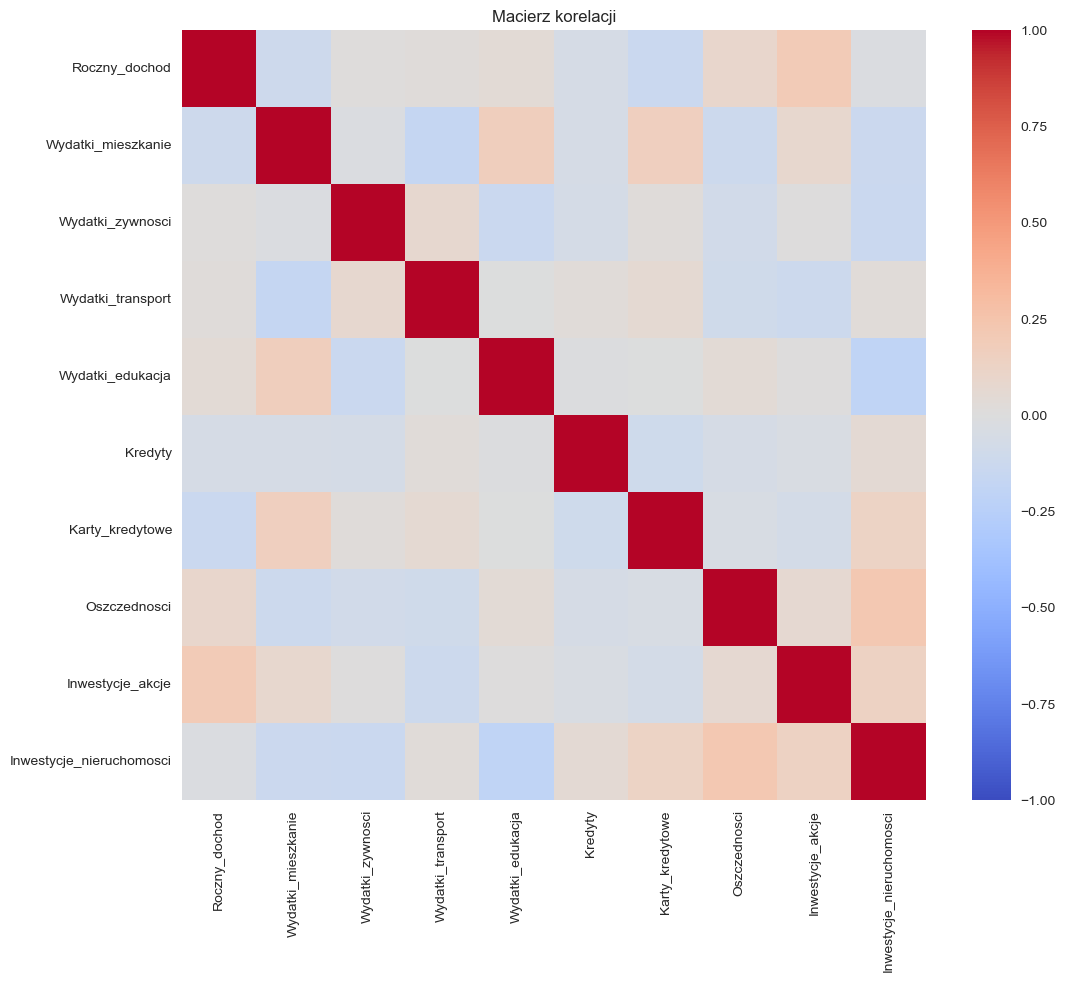

In [14]:
# 4. Analiza segmentacji klientów:

# Analiza segmentacji klientów:
# •Zadanie polega na segmentacji klientów na podstawie danych
# demograficznych, zachowań zakupowych i preferencji. Możecie
# wykorzystać techniki segmentacji (dendrogramy), czy takie jak
# analiza skupień (np. k-means) lub analiza głównych składowych
# (PCA), aby zidentyfikować podobne grupy klientów i lepiej
# zrozumieć ich potrzeby i zachowania.
    
# Zachowania zakupowe: Roczny dochód, wydatki miesięczne na mieszkanie, jedzenie, 
# transport, edukację, kredyty, karty kredytowe, oszczędności, inwestycje.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

zachowania_zakupowe = [
    'Roczny_dochod', 'Wydatki_mieszkanie', 'Wydatki_zywnosci', 
    'Wydatki_transport', 'Wydatki_edukacja', 'Kredyty', 
    'Karty_kredytowe', 'Oszczednosci', 'Inwestycje_akcje', 
    'Inwestycje_nieruchomosci'
]
df_one_hot = df_combined[zachowania_zakupowe]

df_one_hot = pd.get_dummies(df_one_hot)
print(df_one_hot.columns)
correlation_matrix = df_one_hot.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Macierz korelacji')

scaler = StandardScaler()
df_one_hot_scaled = scaler.fit_transform(df_one_hot)
print(df_one_hot_scaled)

In [15]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_one_hot_scaled)

# Tworzenie DataFrame dla głównych składowych
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Nagłówki DataFrame po PCA:")
print(df_pca.head())

print("\nProcent wariancji wyjaśnionej przez każdą składową:")
print(pca.explained_variance_ratio_)

Nagłówki DataFrame po PCA:
        PC1       PC2
0  0.931745  0.962723
1  1.959831 -2.155143
2  3.105335 -1.546849
3 -0.758370  1.318333
4  1.034043 -1.534978

Procent wariancji wyjaśnionej przez każdą składową:
[0.14816388 0.13582569]


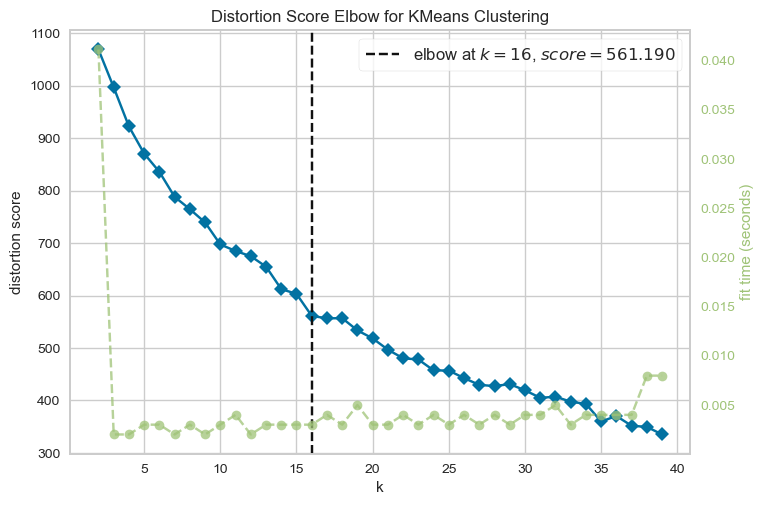

16

In [16]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 40))
visualizer.fit(df_one_hot_scaled)
visualizer.show()
optimal_clusters = visualizer.elbow_value_
optimal_clusters

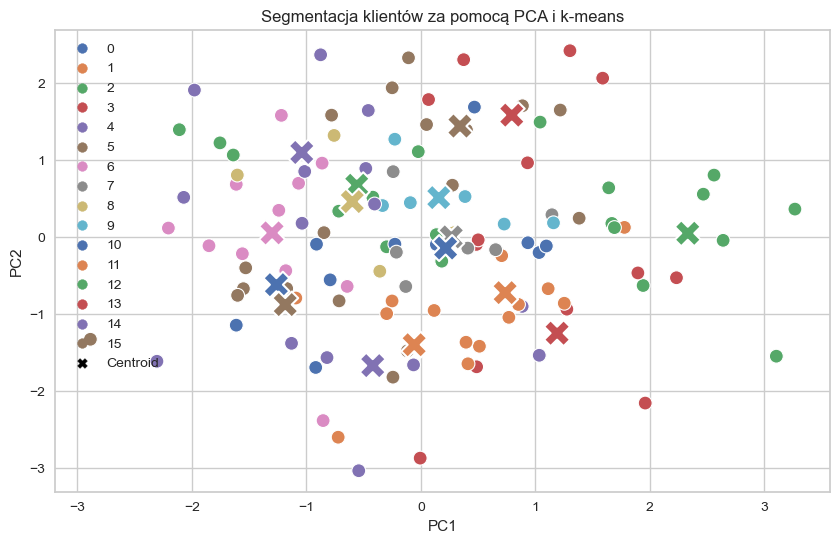

Nagłówki DataFrame po dodaniu klastrów:


,Roczny_dochod,Wydatki_mieszkanie,Wydatki_zywnosci,Wydatki_transport,Wydatki_edukacja,Kredyty,Karty_kredytowe,Oszczednosci,Inwestycje_akcje,Inwestycje_nieruchomosci,Cluster
57,74180,23886,9515,4191,4538,32884,3748,18007,13952,12369,0
18,104466,24095,8089,1696,4104,12383,7837,27309,18039,19876,1
7,113846,19297,5395,4808,2017,26152,9425,4850,14097,34343,2
1,119271,17003,4375,1848,2502,7326,2538,49476,14467,38477,3
4,117855,7679,2691,4868,4686,2023,3952,16747,18399,29092,4
82,45484,20225,4120,1100,3133,25101,9988,44289,11735,33537,5
6,116736,13472,4003,5417,3780,47456,8700,5130,2422,16138,6
28,99224,5739,7346,5736,3212,23218,6819,22901,18858,34203,7
3,118727,5903,9643,4745,3648,45668,1629,1130,3215,5580,8
52,77191,14724,6122,6647,837,4485,1745,28474,18058,18973,9


In [17]:
# K-means z optymalną ilością klastrów metodą elbow
amount_of_clusters = optimal_clusters
kmeans = KMeans(n_clusters=amount_of_clusters)
kmeans.fit(df_one_hot_scaled)
clusters = kmeans.predict(df_one_hot_scaled)
df_one_hot['Cluster'] = clusters
df_pca['Cluster'] = clusters

# Przekształcenie współrzędnych centroidów do przestrzeni PCA
pca = PCA(n_components=2)
pca.fit(df_one_hot_scaled)
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# Utworzenie DataFrame dla centroidów
centroids_df = pd.DataFrame(cluster_centers_pca, columns=['PC1', 'PC2'])
centroids_df['Cluster'] = range(amount_of_clusters)

plt.figure(figsize=(10, 6))
palette = sns.color_palette('deep', n_colors=amount_of_clusters)

# Rysowanie punktów danych
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette=palette, s=100, legend="full")

# Rysowanie centroidów
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=centroids_df, palette=palette, marker='X', s=350, legend=False)
plt.scatter([], [], c='black', marker='X', label=f'Centroid')
plt.title('Segmentacja klientów za pomocą PCA i k-means')
plt.legend()
plt.show()

# Wyświetlenie nagłówków DataFrame po dodaniu klastrów
print("Nagłówki DataFrame po dodaniu klastrów:")
example_per_cluster = df_one_hot.groupby('Cluster').head(1)
example_per_cluster = example_per_cluster.sort_values(by='Cluster')
example_per_cluster

In [18]:
# Analiza cech poszczególnych klastrów
cluster_analysis = df_one_hot.groupby('Cluster').mean()
cluster_analysis

,Roczny_dochod,Wydatki_mieszkanie,Wydatki_zywnosci,Wydatki_transport,Wydatki_edukacja,Kredyty,Karty_kredytowe,Oszczednosci,Inwestycje_akcje,Inwestycje_nieruchomosci
Cluster,,,,,,,,,,
0,49252.000000,21572.500000,8861.000000,3931.000000,4451.000000,34887.000000,1939.500000,21295.000000,10551.000000,23463.500000
1,75886.166667,20402.500000,6461.333333,2158.166667,3289.500000,10844.833333,7870.666667,32048.500000,12693.833333,40090.000000
2,70278.500000,20211.600000,6448.700000,4940.900000,2042.000000,31279.600000,8559.400000,13809.200000,9080.700000,43353.200000
3,100004.285714,12329.857143,4104.285714,1710.857143,3149.285714,21899.428571,3609.000000,42673.428571,8695.571429,29761.142857
4,85063.571429,16780.714286,3577.142857,3252.714286,4025.142857,17299.285714,2966.571429,15006.000000,14798.000000,15382.428571
5,32206.333333,20086.333333,4507.777778,1624.111111,3087.222222,31302.000000,6461.222222,26229.333333,9031.111111,17944.333333
6,86476.727273,16507.545455,5789.909091,5100.727273,3917.090909,32675.272727,6839.272727,19213.909091,5365.636364,9452.000000
7,63667.857143,8822.857143,8682.714286,4756.857143,3832.428571,25707.857143,5954.285714,36900.285714,15402.428571,20524.571429
8,90492.800000,8518.400000,7276.400000,4066.600000,3978.800000,36833.000000,1778.200000,6184.000000,6521.600000,14479.600000


C:\Users\p-mar\AppData\Local\Temp\ipykernel_19720\15184447.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='complete')


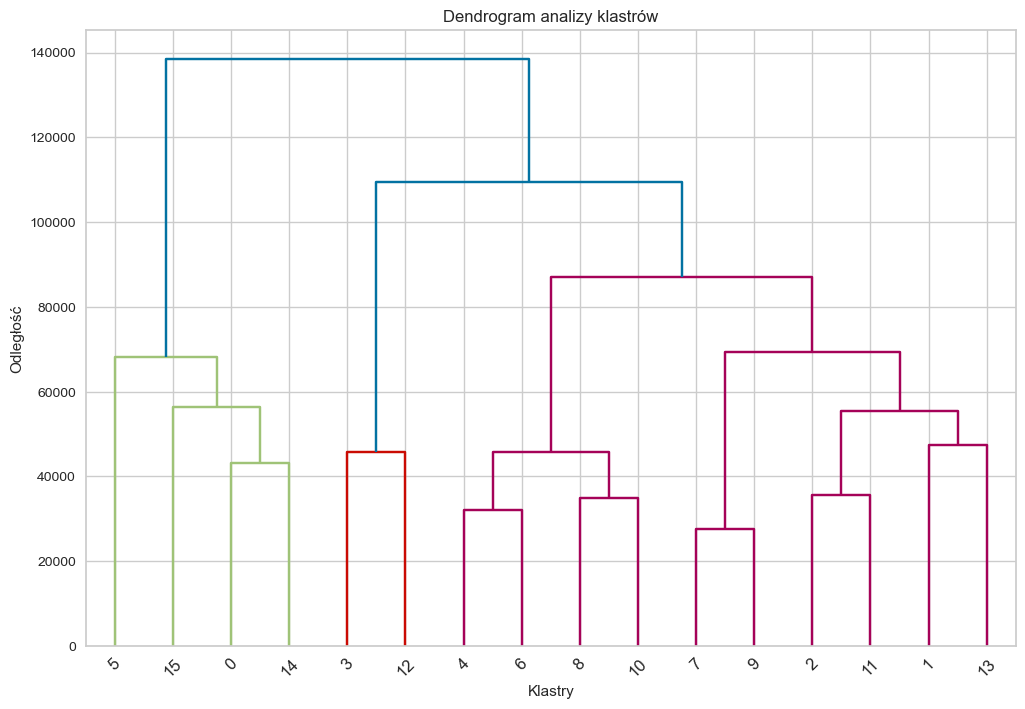

In [19]:
# Przykładowy dendrogram ze średnich wartości cech klastrów 

from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_analysis = df_one_hot.groupby('Cluster').mean()

# Obliczenie macierzy odległości (tutaj używamy odległości euklidesowej)
distances = pairwise_distances(cluster_analysis, metric='euclidean')

# Stworzenie macierzy połączeń
linkage_matrix = linkage(distances, method='complete')

# Wizualizacja dendrogramu
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=cluster_analysis.index, orientation='top')
plt.title('Dendrogram analizy klastrów')
plt.xlabel('Klastry')
plt.ylabel('Odległość')
plt.xticks(rotation=45)
plt.show()

   ID  Roczny_dochod  Suma_wydatkow  Wskaźnik_równowagi Interpretacja
0   2         119751          55442               64309     Pozytywna
1  51         119271          35592               83679     Pozytywna
2  94         119036          57179               61857     Pozytywna
3  47         118727          71236               47491     Pozytywna
4  70         117855          25899               91956     Pozytywna


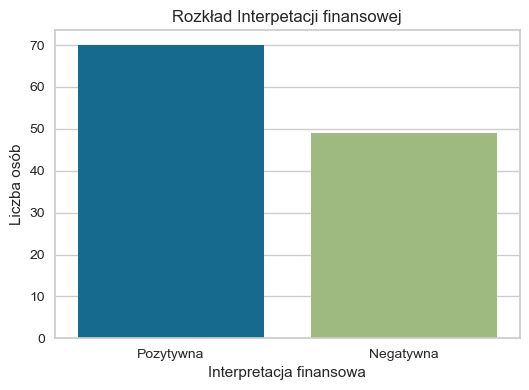

In [20]:
# 5. Wskaźnik równowagi budżetowej:

# •Ten wskaźnik mierzy różnicę między dochodem a wydatkami.
# Pozytywna równowaga budżetowa oznacza, że dochód
# przewyższa wydatki, co może oznaczać zdolność do
# oszczędzania lub inwestowania. Negatywna równowaga
# budżetowa oznacza, że wydatki przewyższają dochód, co może
# wskazywać na potrzebę zmniejszenia wydatków lub zwiększenia
# dochodu.

df_budget = df_combined.copy(deep=True)
df_budget['Suma_wydatkow'] = df_budget[['Wydatki_mieszkanie', 'Wydatki_zywnosci', 
                                            'Wydatki_transport', 'Wydatki_edukacja', 
                                            'Kredyty', 'Karty_kredytowe']].sum(axis=1)

# Obliczenie wskaźnika równowagi budżetowej
df_budget['Wskaźnik_równowagi'] = df_budget['Roczny_dochod'] - df_budget['Suma_wydatkow']

# Interpretacja wskaźnika równowagi budżetowej
df_budget['Interpretacja'] = df_budget['Wskaźnik_równowagi'].apply(lambda x: 'Pozytywna' if x > 0 else 'Negatywna')

print(df_budget[['ID', 'Roczny_dochod', 'Suma_wydatkow', 'Wskaźnik_równowagi', 'Interpretacja']].head())

plt.figure(figsize=(6, 4))
sns.countplot(x='Interpretacja', data=df_budget)
plt.title("Rozkład Interpetacji finansowej")
plt.xlabel("Interpretacja finansowa")
plt.ylabel("Liczba osób")
plt.show()

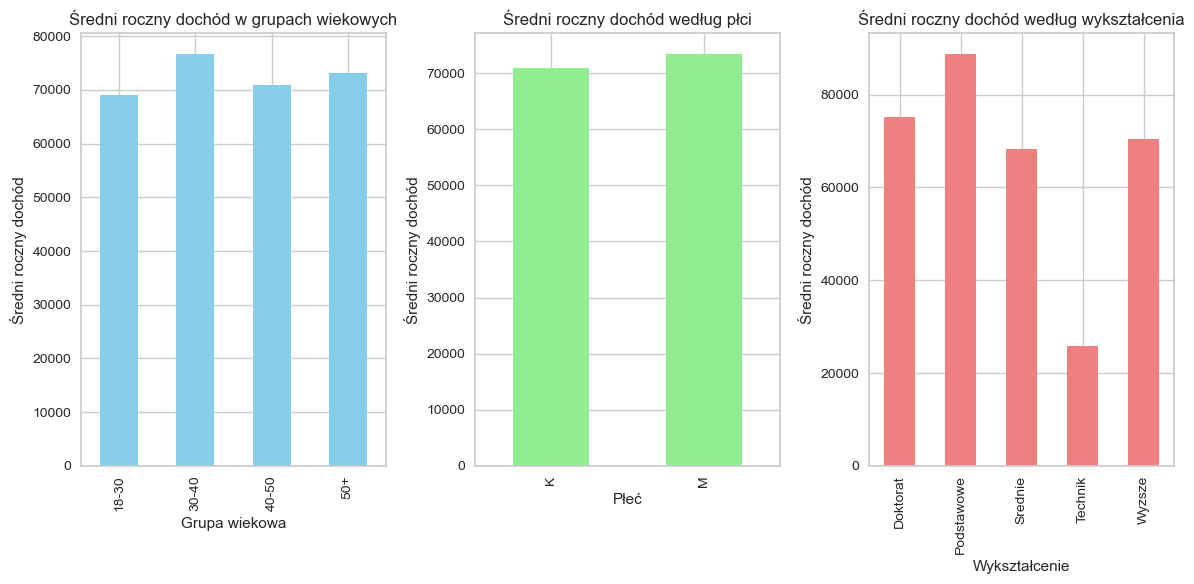

,Wydatki_mieszkanie,Wydatki_zywnosci,Wydatki_transport,Wydatki_edukacja
Grupa_wiekowa,,,,
18-30,14904.5625,6459.937500,3891.781250,2760.781250
30-40,15125.7500,5685.428571,4130.035714,2802.428571
40-50,13694.8750,5957.500000,4454.791667,2228.041667
50+,14889.0000,5301.342857,3813.514286,3106.742857


In [21]:
# 6. Analiza finansowa:
# •Zadanie polega na analizie danych finansowych osób, takich
# jak dochód roczny, wydatki na różne kategorie, zadłużenie,
# oszczędności i inwestycje. Możecie przeprowadzić analizę
# porównawczą dochodów i wydatków w różnych grupach
# wiekowych, płciowych czy poziomie wykształcenia. Możecie
# również badać zależności pomiędzy różnymi zmiennymi, na
# przykład między dochodem a oszczędnościami czy między
# wydatkami na mieszkanie a zadłużeniem.

df_finance = df_combined

bins = [18, 30, 40, 50, 100]
labels = ['18-30', '30-40', '40-50', '50+']
df_finance['Grupa_wiekowa'] = pd.cut(df_combined['Wiek'], bins=bins, labels=labels, right=False)

wiek_dochod = df_finance.groupby('Grupa_wiekowa')['Roczny_dochod'].mean()
wiek_wydatki = df_finance.groupby('Grupa_wiekowa')[['Wydatki_mieszkanie', 'Wydatki_zywnosci', 'Wydatki_transport', 'Wydatki_edukacja']].mean()

plec_dochod = df_finance.groupby('Plec')['Roczny_dochod'].mean()
plec_wydatki = df_finance.groupby('Plec')[['Wydatki_mieszkanie', 'Wydatki_zywnosci', 'Wydatki_transport', 'Wydatki_edukacja']].mean()

wyksztalcenie_dochod = df_finance.groupby('Wyksztalcenie')['Roczny_dochod'].mean()
wyksztalcenie_wydatki = df_finance.groupby('Wyksztalcenie')[['Wydatki_mieszkanie', 'Wydatki_zywnosci', 'Wydatki_transport', 'Wydatki_edukacja']].mean()

plt.figure(figsize=(12, 6))

# Wykres dochodów według grup wiekowych
plt.subplot(1, 3, 1)
wiek_dochod.plot(kind='bar', color='skyblue')
plt.title('Średni roczny dochód w grupach wiekowych')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Średni roczny dochód')

# Wykres dochodów według płci
plt.subplot(1, 3, 2)
plec_dochod.plot(kind='bar', color='lightgreen')
plt.title('Średni roczny dochód według płci')
plt.xlabel('Płeć')
plt.ylabel('Średni roczny dochód')

# Wykres dochodów według wykształcenia
plt.subplot(1, 3, 3)
wyksztalcenie_dochod.plot(kind='bar', color='lightcoral')
plt.title('Średni roczny dochód według wykształcenia')
plt.xlabel('Wykształcenie')
plt.ylabel('Średni roczny dochód')

plt.tight_layout()
plt.show()

# Wydatki według grup wiekowych
wiek_wydatki

In [22]:
plec_wydatki

,Wydatki_mieszkanie,Wydatki_zywnosci,Wydatki_transport,Wydatki_edukacja
Plec,,,,
K,15746.638298,5828.531915,4210.744681,2768.957447
M,14030.097222,5840.222222,3925.847222,2762.236111


In [23]:
wyksztalcenie_wydatki

,Wydatki_mieszkanie,Wydatki_zywnosci,Wydatki_transport,Wydatki_edukacja
Wyksztalcenie,,,,
Doktorat,14503.565217,5696.130435,3766.217391,3154.173913
Podstawowe,13373.280000,5422.720000,4291.680000,3008.640000
Srednie,14310.032258,5444.032258,4023.741935,2427.709677
Technik,17973.833333,6691.833333,3249.333333,2061.166667
Wyzsze,15614.441176,6439.470588,4188.794118,2753.941176


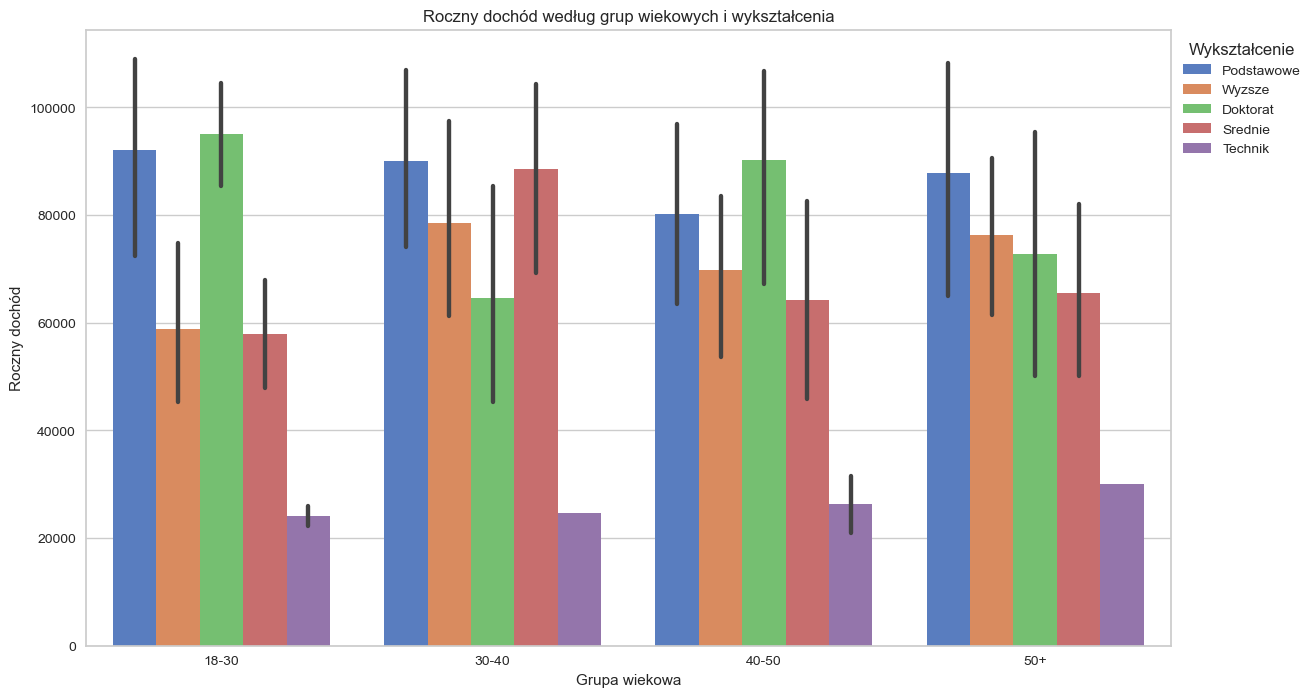

In [24]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_finance, x='Grupa_wiekowa', y='Roczny_dochod', hue='Wyksztalcenie', palette='muted')
plt.title('Roczny dochód według grup wiekowych i wykształcenia')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Roczny dochód')
plt.legend(title='Wykształcenie', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

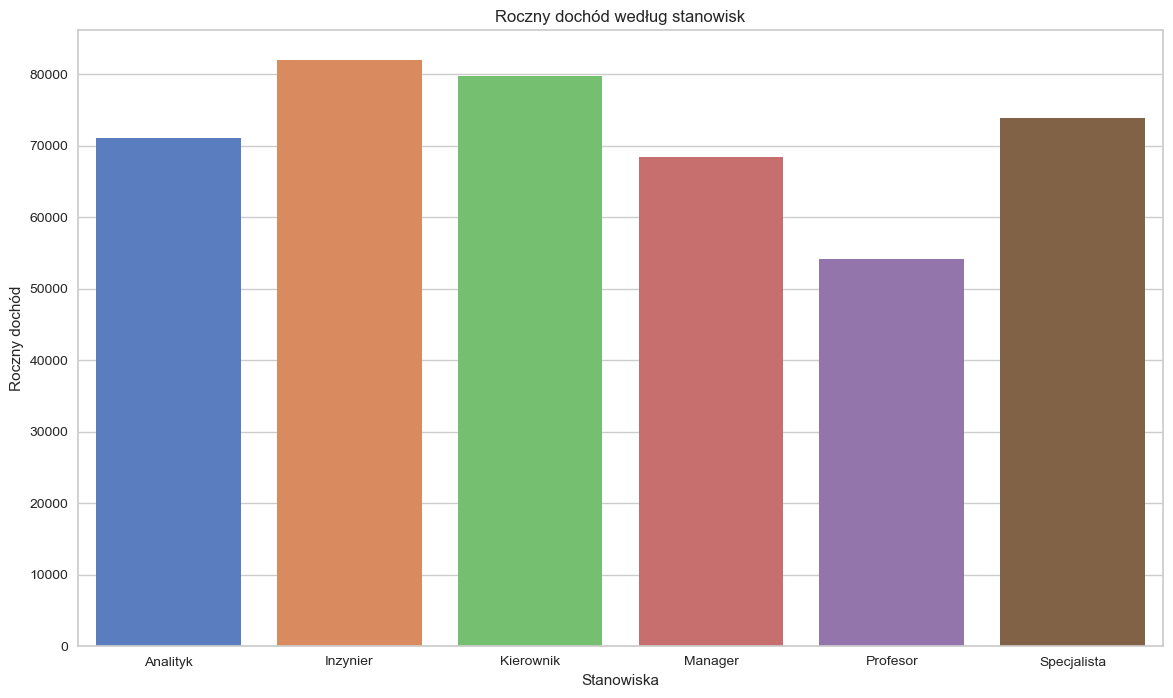

In [25]:
# 7. Analiza zawodowa:
# •Zadanie polega na analizie danych zawodowych, takich jak
# stanowisko, branża i lata doświadczenia. Możecie badać różnice
# w zarobkach między różnymi stanowiskami czy branżami,
# analizować trend związany z lata doświadczenia a zarobkami
# oraz identyfikować dominujące stanowiska w poszczególnych
# branżach.


df_works = df_combined.copy(deep=True)
# print(df_works.columns)

stanowiska = df_works.groupby('Stanowisko')['Roczny_dochod'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=stanowiska, x='Stanowisko', y='Roczny_dochod', palette='muted')
plt.title('Roczny dochód według stanowisk')
plt.xlabel('Stanowiska')
plt.ylabel('Roczny dochód')
plt.show()

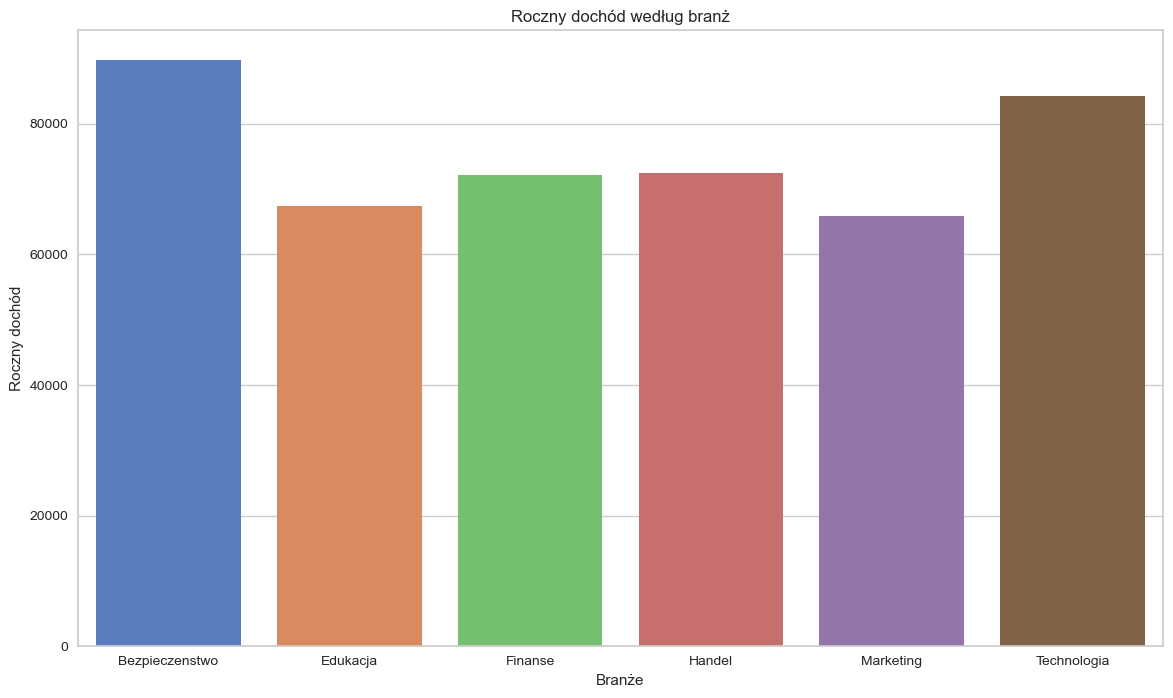

In [26]:
branze = df_works.groupby('Branza')['Roczny_dochod'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=branze, x='Branza', y='Roczny_dochod', palette='muted')
plt.title('Roczny dochód według branż')
plt.xlabel('Branże')
plt.ylabel('Roczny dochód')
plt.show()

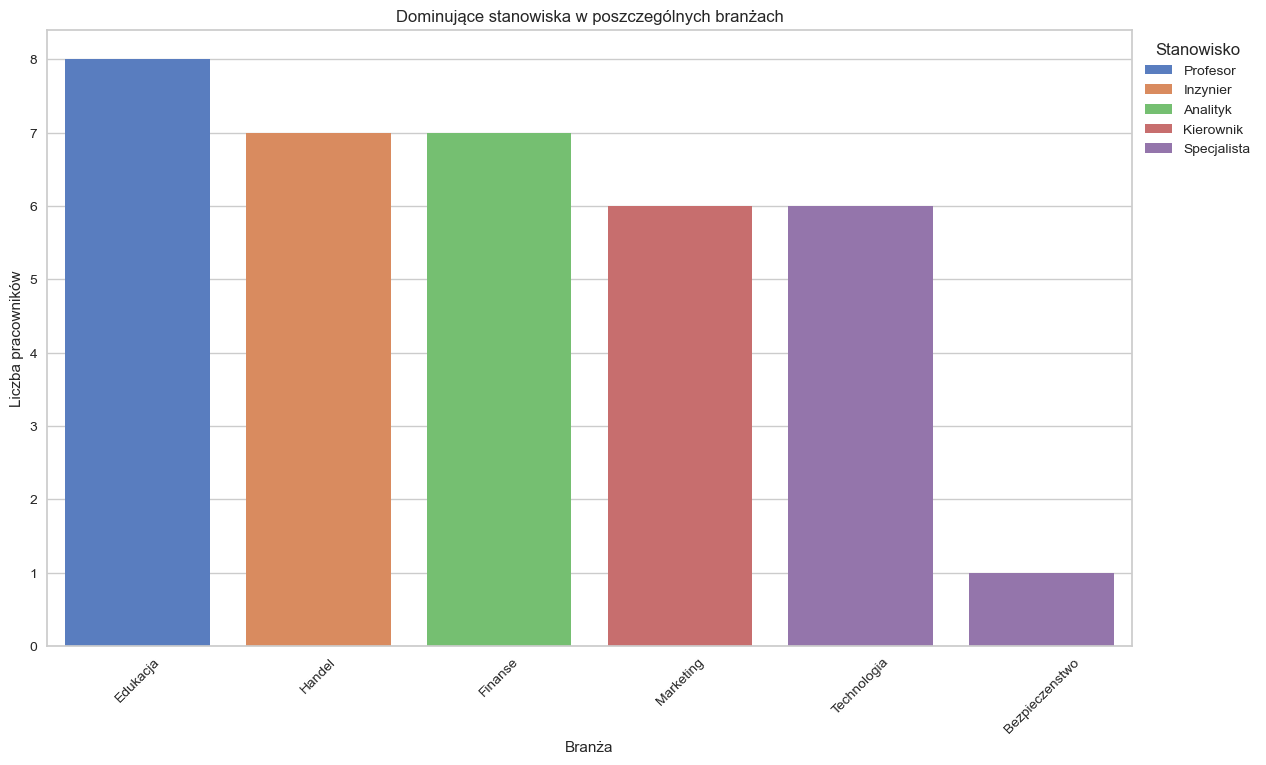

In [27]:
dominujace_stanowiska = df_works.groupby(['Branza', 'Stanowisko']).size().reset_index(name='Liczba_pracownikow')
dominujace_stanowiska = dominujace_stanowiska.sort_values('Liczba_pracownikow', ascending=False).groupby('Branza').head(1)

plt.figure(figsize=(14, 8))
sns.barplot(data=dominujace_stanowiska, x='Branza', y='Liczba_pracownikow', hue='Stanowisko', dodge=False, palette='muted')
plt.title('Dominujące stanowiska w poszczególnych branżach')
plt.xlabel('Branża')
plt.ylabel('Liczba pracowników')
plt.xticks(rotation=45)
plt.legend(title='Stanowisko', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [28]:
dominujace_stanowiska

,Branza,Stanowisko,Liczba_pracownikow
6,Edukacja,Profesor,8
15,Handel,Inzynier,7
8,Finanse,Analityk,7
22,Marketing,Kierownik,6
30,Technologia,Specjalista,6
2,Bezpieczenstwo,Specjalista,1


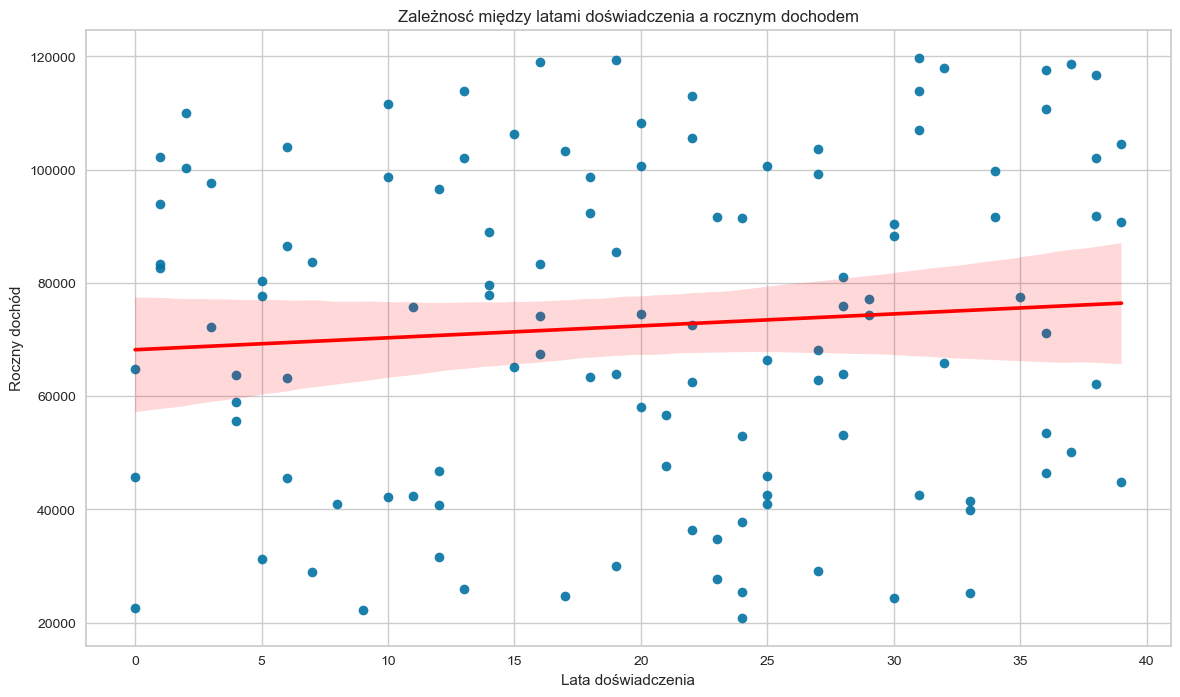

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 19
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        119 non-null    int64   
 1   Wiek                      119 non-null    int64   
 2   Plec                      119 non-null    object  
 3   Wyksztalcenie             119 non-null    object  
 4   Roczny_dochod             119 non-null    int64   
 5   Wydatki_mieszkanie        119 non-null    int64   
 6   Wydatki_zywnosci          119 non-null    int64   
 7   Wydatki_transport         119 non-null    int64   
 8   Wydatki_edukacja          119 non-null    int64   
 9   Kredyty                   119 non-null    int64   
 10  Karty_kredytowe           119 non-null    int64   
 11  Osoby_zalezne             119 non-null    int64   
 12  Oszczednosci              119 non-null    int64   
 13  Inwestycje_akcje          119 non-null    int64   


In [29]:
plt.figure(figsize=(14,8))
sns.regplot(data=df_works, x='Lata_doswiadczenia', y='Roczny_dochod', scatter_kws={'alpha':0.9}, line_kws={'color':'red'})
plt.title('Zależnosć między latami doświadczenia a rocznym dochodem')
plt.xlabel('Lata doświadczenia')
plt.ylabel('Roczny dochód')
plt.show()
df_works.info()


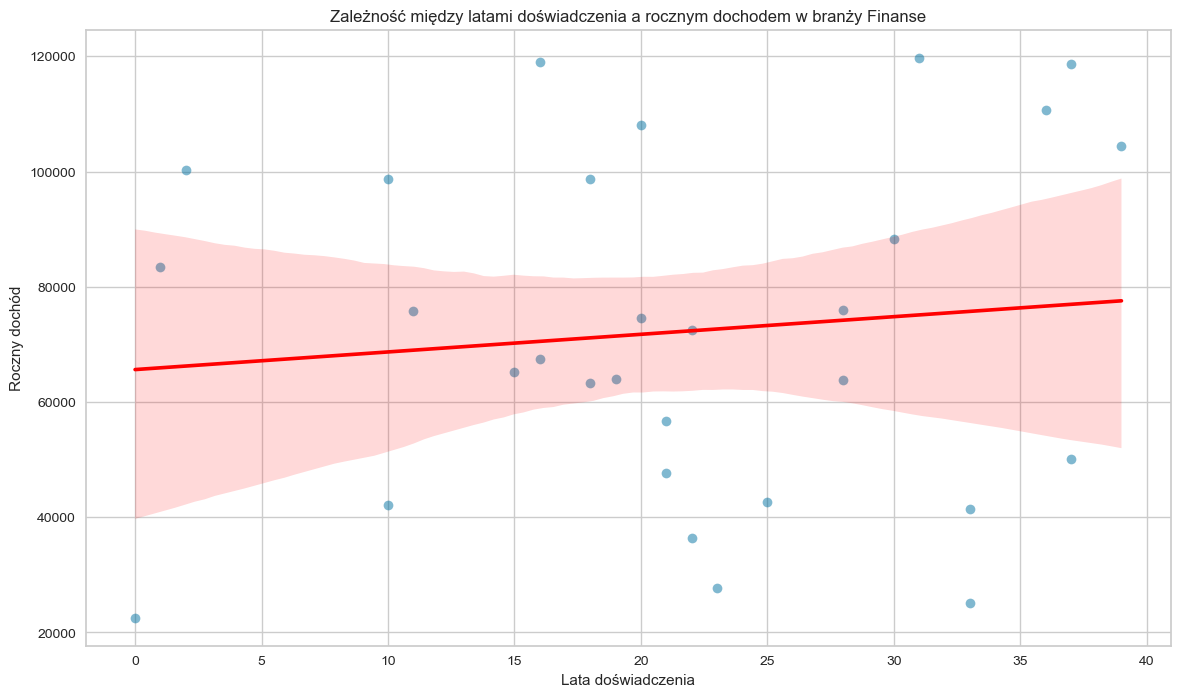

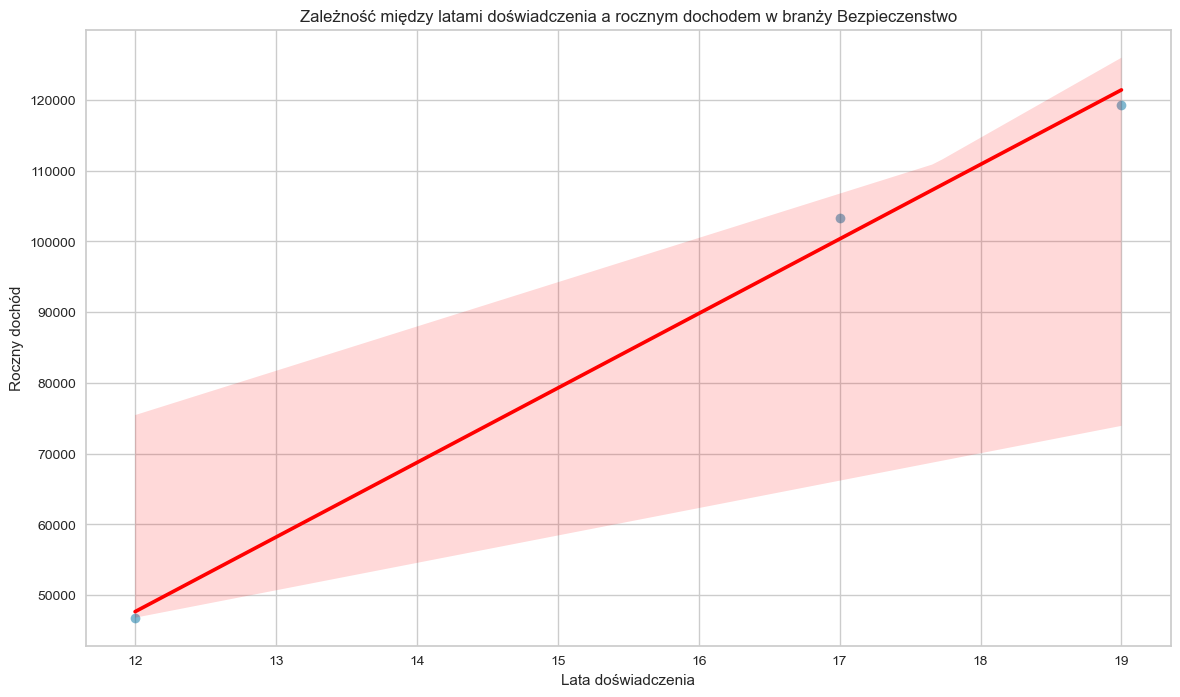

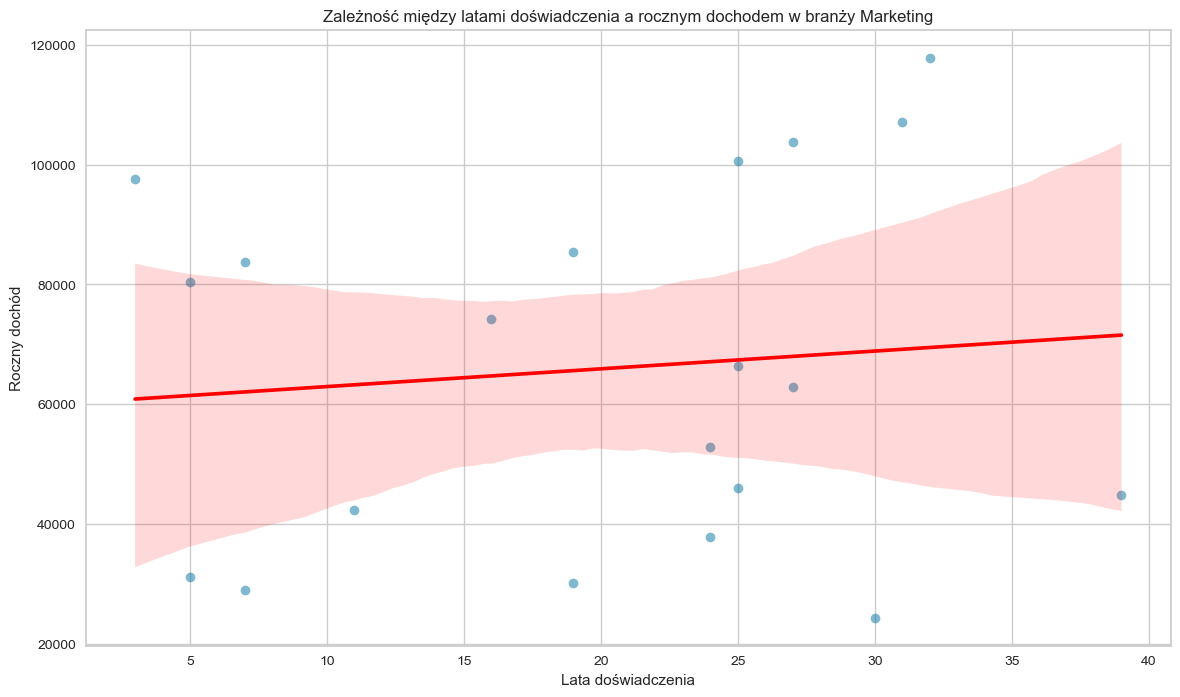

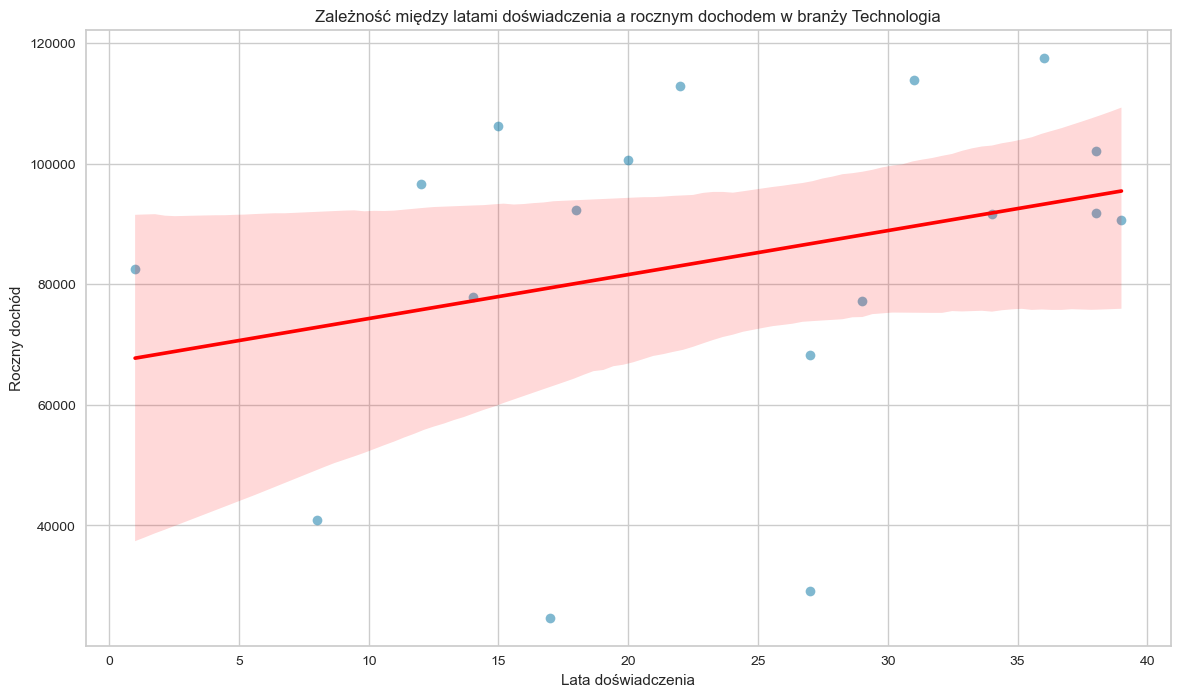

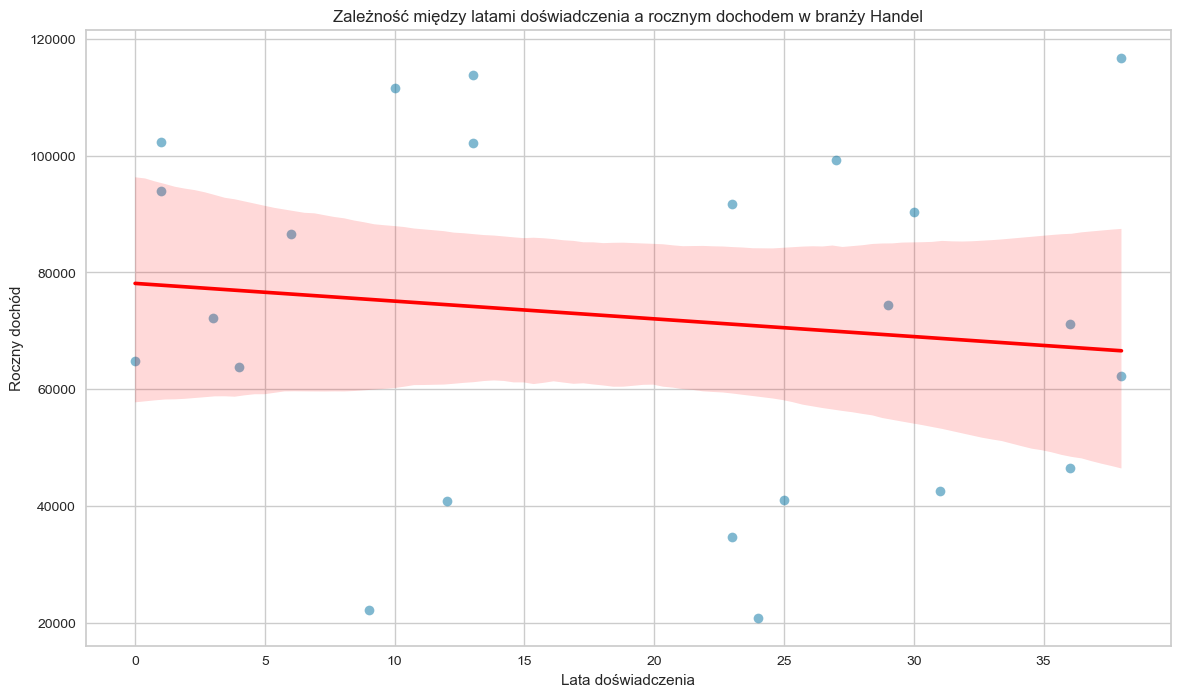

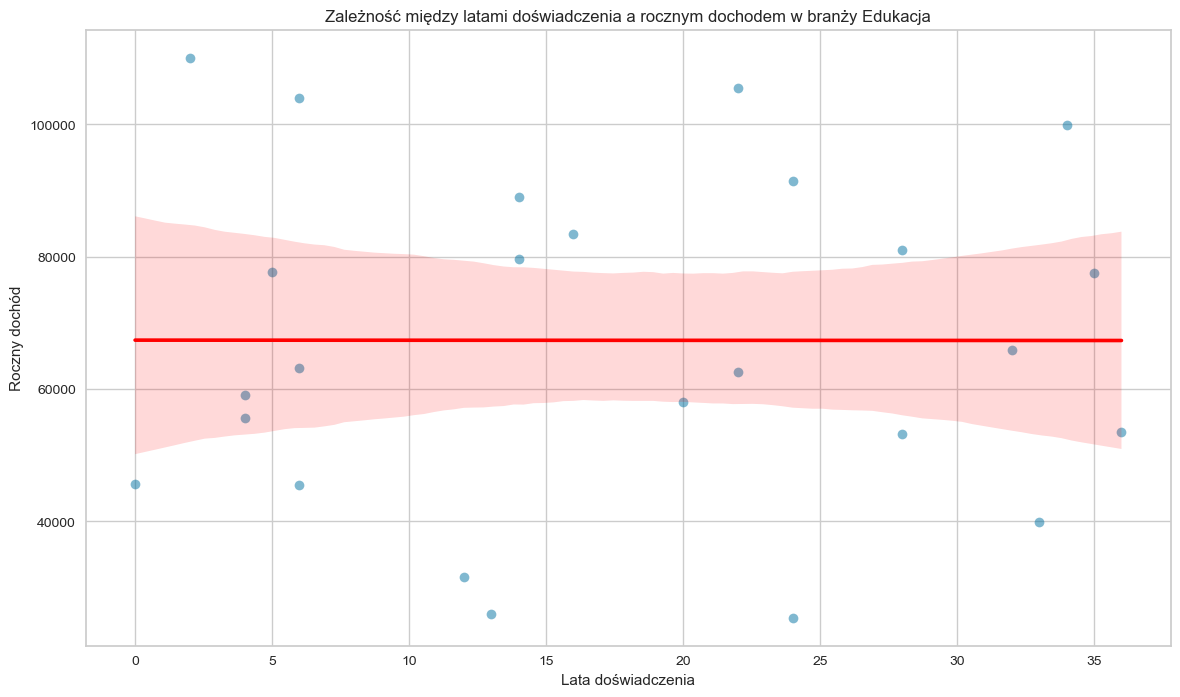

In [30]:
branze_nazwy = df_works['Branza'].unique().tolist()

for i in branze_nazwy:
    plt.figure(figsize=(14, 8))
    df_branza = df_works[df_works['Branza'] == i]
    sns.regplot(data=df_branza, x='Lata_doswiadczenia', y='Roczny_dochod', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Zależność między latami doświadczenia a rocznym dochodem w branży {i}')
    plt.xlabel('Lata doświadczenia')
    plt.ylabel('Roczny dochód')
    plt.show()

In [31]:
# 8. Analiza wpływu zmiennych na zadłużenie i zdolność kredytową:

# •Badanie, jakie czynniki wpływają na poziom zadłużenia i
# zdolność kredytową badanych osób. Można zbadać, czy wiek,
# dochód czy liczba osób zależnych mają wpływ na poziom
# zadłużenia oraz czy posiadanie kart kredytowych wpływa na
# zdolność kredytową

columns_of_interest = ['Wiek', 'Roczny_dochod', 'Osoby_zalezne', 'Kredyty', 'Karty_kredytowe']
df_analysis = df_combined[columns_of_interest]
df_analysis_2 = df_combined.copy(deep=True)
print(df_analysis.head())

   Wiek  Roczny_dochod  Osoby_zalezne  Kredyty  Karty_kredytowe
0    18         119751              2    22893             5310
1    18         119271              1     7326             2538
2    39         119036              1    40532              571
3    53         118727              1    45668             1629
4    64         117855              3     2023             3952


In [32]:
correlation = df_analysis.corr()
correlation['Kredyty']

Wiek               0.114695
Roczny_dochod     -0.059254
Osoby_zalezne      0.064441
Kredyty            1.000000
Karty_kredytowe   -0.103540
Name: Kredyty, dtype: float64

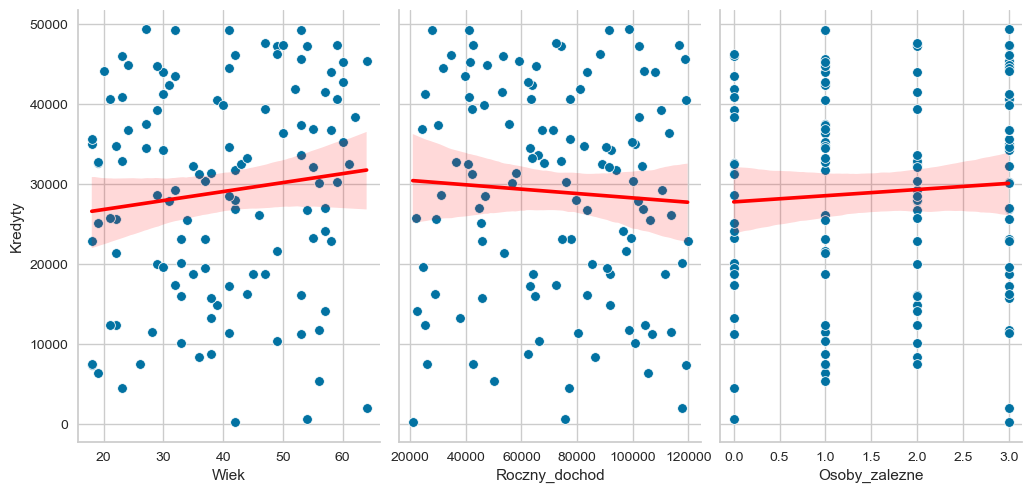

In [33]:
g = sns.pairplot(df_analysis, x_vars=['Wiek', 'Roczny_dochod', 'Osoby_zalezne'], y_vars='Kredyty', height=5, aspect=0.7)

for ax in g.axes.flatten():
    if ax.get_xlabel() in ['Wiek', 'Roczny_dochod', 'Osoby_zalezne']:
        sns.regplot(x=ax.get_xlabel(), y='Kredyty', data=df_analysis, ax=ax, scatter=False, line_kws={"color":"red"})

plt.show()


In [34]:
df_analysis.corr()

,Wiek,Roczny_dochod,Osoby_zalezne,Kredyty,Karty_kredytowe
Wiek,1.000000,0.050418,0.061661,0.114695,-0.058609
Roczny_dochod,0.050418,1.000000,-0.057406,-0.059254,-0.134423
Osoby_zalezne,0.061661,-0.057406,1.000000,0.064441,0.071067
Kredyty,0.114695,-0.059254,0.064441,1.000000,-0.103540
Karty_kredytowe,-0.058609,-0.134423,0.071067,-0.103540,1.000000


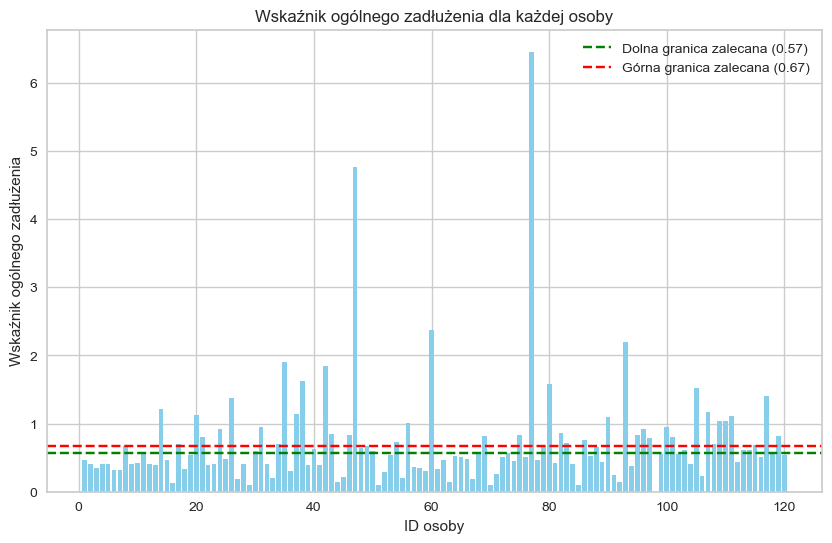

In [35]:
#Wskaźnik ogólnego zadłużenia = zobowiązania ogółem / aktywa ogółem

df_analysis_2['Zobowiazania_ogolem'] = df_analysis_2['Kredyty'] + df_analysis_2['Karty_kredytowe']
df_analysis_2['Aktywa_ogolem'] = df_analysis_2['Oszczednosci'] + df_analysis_2['Inwestycje_akcje'] + df_analysis_2['Inwestycje_nieruchomosci']
df_analysis_2['Wskaznik_ogolnego_zadluzenia'] = df_analysis_2['Zobowiazania_ogolem'] / df_analysis_2['Aktywa_ogolem']

plt.figure(figsize=(10, 6))
plt.bar(df_analysis_2['ID'], df_analysis_2['Wskaznik_ogolnego_zadluzenia'], color='skyblue')
plt.xlabel('ID osoby')
plt.ylabel('Wskaźnik ogólnego zadłużenia')
plt.title('Wskaźnik ogólnego zadłużenia dla każdej osoby')
plt.axhline(0.57, color='green', linestyle='--', label='Dolna granica zalecana (0.57)')
plt.axhline(0.67, color='red', linestyle='--', label='Górna granica zalecana (0.67)')
plt.legend()
plt.show()

In [36]:
below_threshold = df_analysis_2[df_analysis_2['Wskaznik_ogolnego_zadluzenia'] < 0.57].shape[0]
within_threshold = df_analysis_2[(df_analysis_2['Wskaznik_ogolnego_zadluzenia'] >= 0.57) & (df_analysis_2['Wskaznik_ogolnego_zadluzenia'] <= 0.67)].shape[0]
above_threshold = df_analysis_2[df_analysis_2['Wskaznik_ogolnego_zadluzenia'] > 0.67].shape[0]

print(f"Liczba osób z niskim wskaźnikiem ogólnego zadłużenia poniżej 0.57: {below_threshold}")
print(f"Liczba osób z wskaźnikiem ogólnego zadłużenia w przedziale 0.57 - 0.67: {within_threshold}")
print(f"Liczba osób z wysokim wskaźnikiem ogólnego zadłużenia powyżej 0.67: {above_threshold}")

# 1. Poniżej 0.57: Niski poziom zadłużenia, co oznacza, że osoba potrafi samodzielnie sfinansować swoją działalność. 
#    Jednak zbyt niski wskaźnik może wskazywać na niewykorzystane możliwości rozwoju.
# 2. W przedziale 0.57 - 0.67: Optymalny poziom zadłużenia, oznaczający zrównoważone finansowanie aktywów z kapitału obcego.
# 3. Powyżej 0.67: Wysoki poziom zadłużenia, co może oznaczać nadmierne ryzyko kredytowe 
#    i większą podatność na trudności finansowe w przypadku pogorszenia koniunktury.

Liczba osób z niskim wskaźnikiem ogólnego zadłużenia poniżej 0.57: 64
Liczba osób z wskaźnikiem ogólnego zadłużenia w przedziale 0.57 - 0.67: 13
Liczba osób z wysokim wskaźnikiem ogólnego zadłużenia powyżej 0.67: 42


     ID  Udzial_mieszkanie  Udzial_zywnosc  Udzial_transport  Udzial_edukacja
0     2          10.391562        6.174479          5.069686         1.110638
1    51          14.255770        3.668117          1.549413         2.097744
2    94           7.550657        1.758292          1.685204         2.511005
3    47           4.971910        8.121994          3.996564         3.072595
4    70           6.515634        2.283314          4.130499         3.976072
..  ...                ...             ...               ...              ...
15  116          37.899733        9.693915          5.368109         5.935749
16  117          33.508472       11.096382          9.491215         4.171989
17  118          13.208400       10.080038         13.505314         1.110203
18  119          59.516248       22.984634          5.164726         2.816540
19  120          41.805599       12.881409         22.109940        13.648160

[119 rows x 5 columns]


<Figure size 1600x600 with 0 Axes>

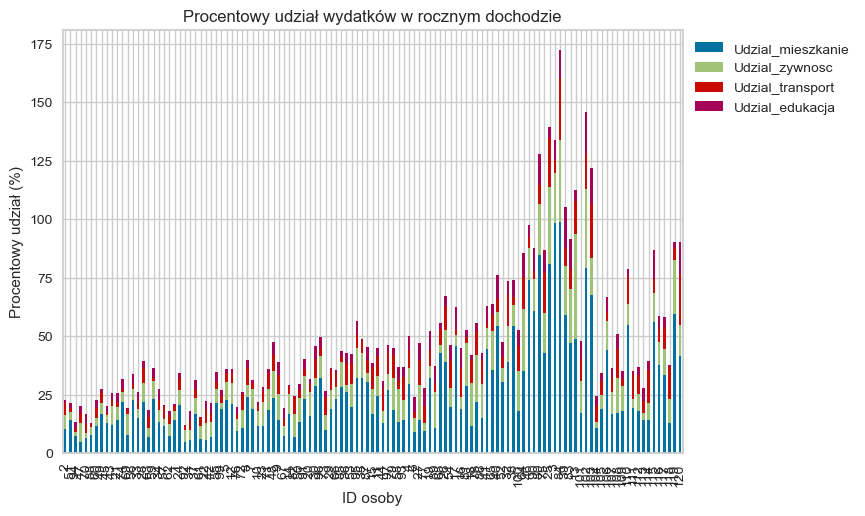

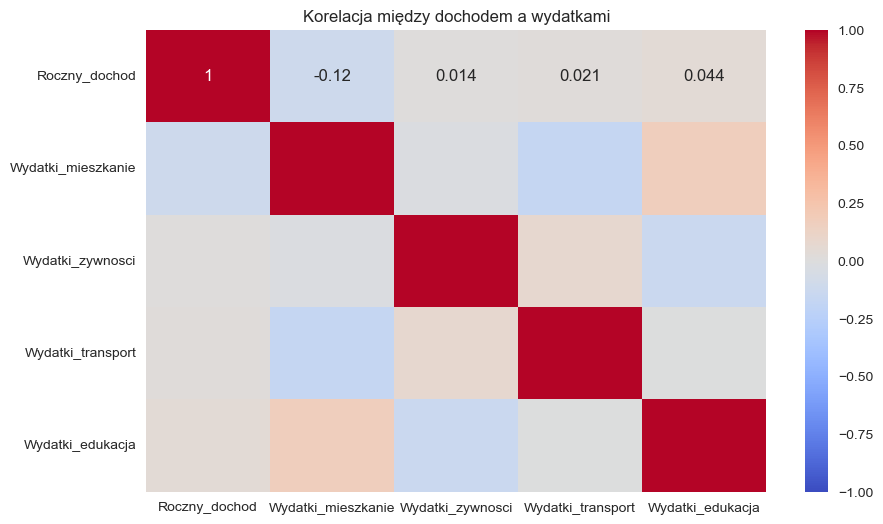

In [37]:
# 9. Analiza dochodu i wydatków:

# •Ocena relacji między rocznym dochodem a różnymi
# kategoriami wydatków, takimi jak wydatki na mieszkanie,
# żywność, transport czy edukację. Można badać, jakie
# procentowo udziały w dochodzie mają poszczególne kategorie
# wydatków oraz czy istnieją związki między dochodem a
# wielkością wydatków

df_expenses = df_combined.copy(deep=True)

df_expenses['Udzial_mieszkanie'] = df_expenses['Wydatki_mieszkanie'] / df_expenses['Roczny_dochod'] * 100
df_expenses['Udzial_zywnosc'] = df_expenses['Wydatki_zywnosci'] / df_expenses['Roczny_dochod'] * 100
df_expenses['Udzial_transport'] = df_expenses['Wydatki_transport'] / df_expenses['Roczny_dochod'] * 100
df_expenses['Udzial_edukacja'] = df_expenses['Wydatki_edukacja'] / df_expenses['Roczny_dochod'] * 100

print(df_expenses[['ID', 'Udzial_mieszkanie', 'Udzial_zywnosc', 'Udzial_transport', 'Udzial_edukacja']])

correlation_matrix = df_expenses[['Roczny_dochod', 'Wydatki_mieszkanie', 'Wydatki_zywnosci', 'Wydatki_transport', 'Wydatki_edukacja']].corr()

plt.figure(figsize=(16, 6))

df_expenses.set_index('ID')[['Udzial_mieszkanie', 'Udzial_zywnosc', 'Udzial_transport', 'Udzial_edukacja']].plot(kind='bar', stacked=True)
plt.title('Procentowy udział wydatków w rocznym dochodzie')
plt.xlabel('ID osoby')
plt.ylabel('Procentowy udział (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelacja między dochodem a wydatkami')
plt.show()

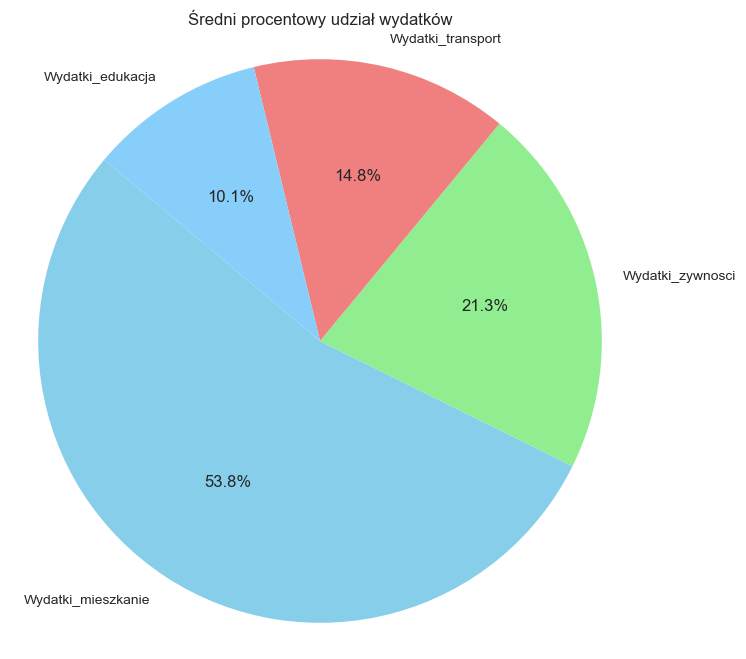

In [38]:
average_shares = df_expenses[['Wydatki_mieszkanie', 'Wydatki_zywnosci', 'Wydatki_transport', 'Wydatki_edukacja']].mean()

plt.figure(figsize=(8, 8))
plt.pie(average_shares, labels=average_shares.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Średni procentowy udział wydatków')
plt.axis('equal')
plt.show()

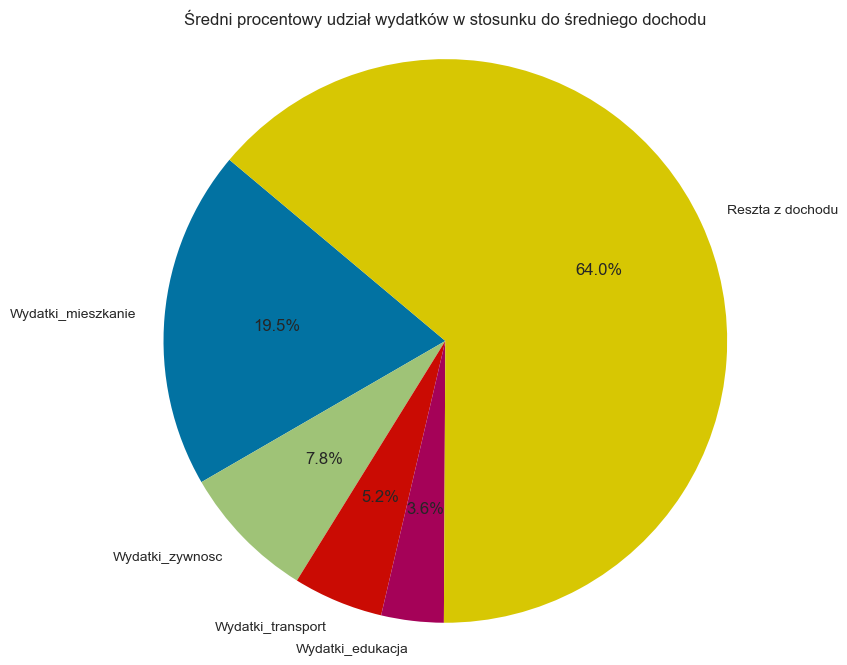

Średni roczny dochód: 76447.86 PLN
Średni reszta z rocznego dochodu po odjeciu wydatków: 48904.29 PLN
Średnie wydatki na mieszkanie: 14879.19 PLN
Średnie wydatki na żywność: 5978.43 PLN
Średnie wydatki na transport: 3950.49 PLN
Średnie wydatki na edukację: 2735.46 PLN


In [39]:
# 10. Wskaźnik udziału w dochodzie dla poszczególnych kategorii
# wydatków:
# •Ten wskaźnik mierzy procentowy udział poszczególnych
# kategorii wydatków w całkowitym dochodzie. Pozwala to
# zidentyfikować, które kategorie wydatków mają największy
# wpływ na całościowy budżet i gdzie można szukać potencjalnych
# oszczędności lub optymalizacji

sredni_dochod = df['Roczny_dochod'].mean()
srednie_wydatki_mieszkanie = df['Wydatki_mieszkanie'].mean()
srednie_wydatki_zywnosc = df['Wydatki_zywnosci'].mean()
srednie_wydatki_transport = df['Wydatki_transport'].mean()
srednie_wydatki_edukacja = df['Wydatki_edukacja'].mean()

reszta_sredni_dochod = sredni_dochod - srednie_wydatki_mieszkanie - srednie_wydatki_zywnosc - srednie_wydatki_transport - srednie_wydatki_edukacja

udzialy = [srednie_wydatki_mieszkanie, srednie_wydatki_zywnosc, srednie_wydatki_transport, srednie_wydatki_edukacja , reszta_sredni_dochod]
etykiety = ['Wydatki_mieszkanie', 'Wydatki_zywnosc', 'Wydatki_transport', 'Wydatki_edukacja', 'Reszta z dochodu']

plt.figure(figsize=(8, 8))
plt.pie(udzialy, labels=etykiety, autopct='%1.1f%%', startangle=140)
plt.title('Średni procentowy udział wydatków w stosunku do średniego dochodu')
plt.axis('equal')
plt.show()

print(f"Średni roczny dochód: {sredni_dochod:.2f} PLN")
print(f"Średni reszta z rocznego dochodu po odjeciu wydatków: {reszta_sredni_dochod:.2f} PLN")
print(f"Średnie wydatki na mieszkanie: {srednie_wydatki_mieszkanie:.2f} PLN")
print(f"Średnie wydatki na żywność: {srednie_wydatki_zywnosc:.2f} PLN")
print(f"Średnie wydatki na transport: {srednie_wydatki_transport:.2f} PLN")
print(f"Średnie wydatki na edukację: {srednie_wydatki_edukacja:.2f} PLN")

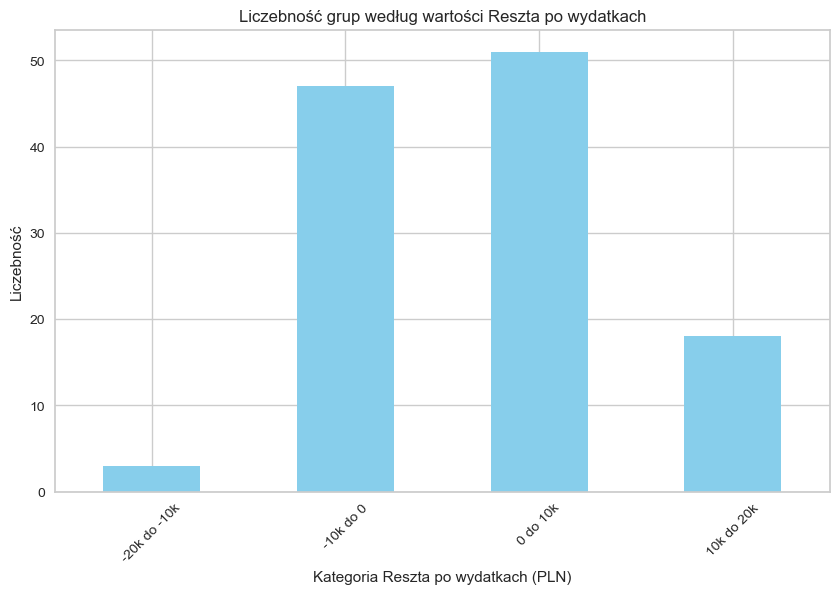

In [40]:
df_expenses['Reszta_po_wydatkach'] = df_expenses['Wydatki_mieszkanie'] - df_expenses['Wydatki_zywnosci'] - df_expenses['Wydatki_transport'] - df_expenses['Wydatki_edukacja']
bins = [-20000, -10000, 0, 10000, 20000]
labels = ['-20k do -10k', '-10k do 0', '0 do 10k', '10k do 20k']
df_expenses['Reszta_kategoria'] = pd.cut(df_expenses['Reszta_po_wydatkach'], bins=bins, labels=labels)

# Zliczanie liczebności poszczególnych kategorii
counts = df_expenses['Reszta_kategoria'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Kategoria Reszta po wydatkach (PLN)')
plt.ylabel('Liczebność')
plt.title('Liczebność grup według wartości Reszta po wydatkach')
plt.xticks(rotation=45)
plt.show()

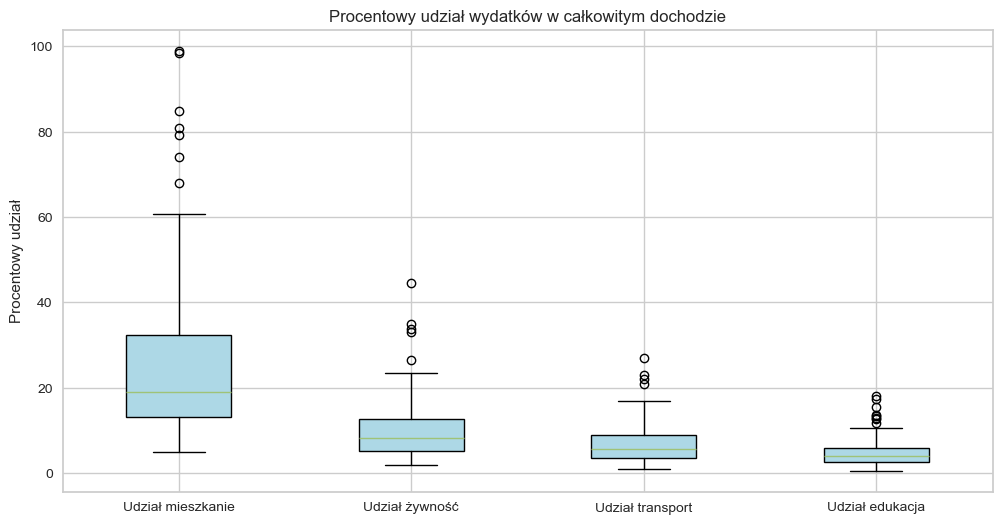

In [41]:
df_expenses['Udzial_mieszkanie']
df_expenses['Udzial_zywnosc']
df_expenses['Udzial_transport'] 
df_expenses['Udzial_edukacja']

plt.figure(figsize=(12, 6))

data_to_plot = [df_expenses['Udzial_mieszkanie'], df_expenses['Udzial_zywnosc'], df_expenses['Udzial_transport'], df_expenses['Udzial_edukacja']]
labels = ['Udział mieszkanie', 'Udział żywność', 'Udział transport', 'Udział edukacja']

plt.boxplot(data_to_plot, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Procentowy udział wydatków w całkowitym dochodzie')
plt.ylabel('Procentowy udział')
plt.grid(True)
plt.show()